# 1 Understanding Large Language Models
## 1.1 definitions
![fig1-1](px/fig1-1.png)
## 1.2 applications
![fig1-2](px/fig1-2.png)
## 1.3 build stages
![fig1-3](px/fig1-3.png)
- custom builds are good
- pretraining (base model, ex: GPT-3) & fine-tuning (on labeled data)
	- _instruction_ finetuning vs _classification_ finetuning

## 1.4 transformers
![fig1-4](px/fig1-4.png)

- "attention is all you need": [https://arxiv.org/abs/1706.03762]
- encoder (lang -> vect), decoder (vect -> lang)
- self-attention: weightings of tokens in sequence relative positioning

![fig1-5](px/fig1-5.png)
- BERT = transformer variant (bidirectional)
	- specializes in __masked word prediction__.
	- X (twitter) uses BERT to see toxic content.
- GPTx = transformer variant
	- focuses on decoder --> designed for _generating_ texts.
 
![fig1-6](px/fig1-6.png)
- BERT and GPT are both good at __zero_shot__ & __few_shot__ learning.

## 1.5 datasets
GPT3 training data:

![table1-1](px/table1-1.png)

## 1.6 GPT architecture
- GPT stands for __Generative Pretrained Transformer__.
- “Improving Language Understanding by Generative Pre-Training” [https://mng.bz/x2qg] by Radford et al. from OpenAI.
- GPT-3 is a scaled-up version of this model that has more parameters and was trained on a larger dataset.
- The original ChatGPT model was created by finetuning GPT-3 on a large instruction dataset using a method from __OpenAI’s InstructGPT__ paper (see chapter 7).
- Next-word prediction is a form of __self-supervised learning__ (aka self-labeling). We don’t need to collect labels for the training data explicitly but can leverage the
structure of the data itself: we can use the next word in a sentence or document as the label that the
model is supposed to predict.
- Since this allows us to create labels “on the fly,” it is possible to leverage massive unlabeled text datasets to train LLMs.

![fig1-8](px/fig1-8.png)

- The general GPT architecture is relatively simple. It’s just the decoder part without the encoder.
- Since decoder-style models like GPT generate text by predicting text one word at a time, they are considered a type of __autoregressive model__. Autoregressive models
incorporate their previous outputs as inputs for future predictions. 
- Architectures such as GPT-3 are significantly larger than the original transformer model. For instance, the original transformer repeated the encoder and decoder blocks six times. GPT-3 has 96 transformer layers and 175 billion parameters in total.

## 1.7 building
![fig1-9](px/fig1-9.png)

# 2 Working with Text Data
## 2.1 word embeddings
- continuous-valued vectors
- word level most common. sentence-, paragraph-, document-level embeds also used.
- sentence- & paragraph-level embeds = popular for RAG.
- RAG: combines text generation with retrieval (searching extern knowledge base)
- word2vec
- LLMs commonly build their own embeddings
- dimensionality: smallest GPT2 = 768 dimensions; largest GPT-3 = 12288 dimensions.

In [1]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
	raw_text = f.read()

print("#characters:", len(raw_text), "\n")
print(raw_text[:99])

#characters: 20480 

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


## 2.2 tokenizing
![fig2-4](px/fig2-4.png)
- the-verdict.txt (https://en.wikisource.org/wiki/The_Verdict)
- whitespace removal: depends on application

In [2]:
# tokenization
import re 
t = "hello world, this is a test."
print(re.split(r'(\s)',t))

# tokenization - splits on whitespaces, commas, periods
print(re.split(r'([,.]|\s)',t))

# remove redundant whitespaces
print([item for item in re.split(r'([,.]|\s)',t) if item.strip()])

# also handle "?", quote marks, double-dashes
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['hello', ' ', 'world,', ' ', 'this', ' ', 'is', ' ', 'a', ' ', 'test.']
['hello', ' ', 'world', ',', '', ' ', 'this', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']
['hello', 'world', ',', 'this', 'is', 'a', 'test', '.']
['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


## 2.3 tokens to IDs
- We previously tokenized a short story by Edith Wharton into individual tokens. Now we will convert these tokens from a Python string to an integer representation to produce __token IDs__. This is an intermediate step before converting token IDs into embedding vectors.
- To map tokens into token IDs, we have to build a vocabulary. It defines how we map each unique word and special character to a unique integer.
![fig2-6](px/fig2-6.png)

In [3]:
# apply tokenizer to short story - answer should be 4649 tokens.
preprocessed = re.split(r'([,.?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))
print(preprocessed[:10])

4649
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius']


In [4]:
# build list of unique tokens, sort by alpha. should be 1159 total.
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size)

1159


In [5]:
# print first 51 entries 
vocab = {token:integer for integer,token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
	print(item)
	if i >= 50:
		break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Carlo;', 25)
('Chicago', 26)
('Claude', 27)
('Come', 28)
('Croft', 29)
('Destroyed', 30)
('Devonshire', 31)
('Don', 32)
('Dubarry', 33)
('Emperors', 34)
('Florence', 35)
('For', 36)
('Gallery', 37)
('Gideon', 38)
('Gisburn', 39)
('Gisburns', 40)
('Grafton', 41)
('Greek', 42)
('Grindle', 43)
('Grindle:', 44)
('Grindles', 45)
('HAD', 46)
('Had', 47)
('Hang', 48)
('Has', 49)
('He', 50)


![fig2-8](px/fig2-8.png)

In [6]:
class SimpleTokenizerV1:

	def __init__(self, vocab):
		# store vocab as class attribute
		self.str_to_int = vocab 
		# create inverse vocab: maps tokens back to orig text tokens
		self.int_to_str = {i:s for s,i in vocab.items()}#B

	# converts text --> token IDs
	def encode(self, text):
		preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
		preprocessed = [
			item.strip() for item in preprocessed if item.strip()
		]
		ids = [self.str_to_int[s] for s in preprocessed]
		return ids
	
	# converts token IDs --> text
	def decode(self, ids):
		text = " ".join([self.int_to_str[i] for i in ids])
		# replaces spaces before specified punctuation
		text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
		return text

# tokenize a passage from the short story:
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know," Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

# turn these tokens back into text:
print(tokenizer.decode(ids))

[1, 58, 2, 872, 1013, 615, 541, 763, 5, 1155, 608, 5, 1, 69, 7, 39, 873, 1136, 773, 812, 7]
" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [7]:
# apply to new sample, not in training set:
# ("Hello" not in vocabulary - bounces out with an error.)
try:
    print(tokenizer.encode("Hello, do you like tea?"))
except Exception:
    print("sorry, but a word from this query is not in the vocabulary.")


sorry, but a word from this query is not in the vocabulary.


## 2.4 special context tokens
![fig2-9](px/fig2-9.png)
- mods tokenizer to use a "junk" token for unknown words
- mods tokenizer to add a token between unrelated texts (aka, between books)

In [8]:
# modify vocab to include "junk" and "endoftext" tokens. new vocab size should be 1161.
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}
print(len(vocab.items()))

# last 5 entries of updated vocab:
for i, item in enumerate(list(vocab.items())[-5:]):
	print(item)

1161
('younger', 1156)
('your', 1157)
('yourself', 1158)
('<|endoftext|>', 1159)
('<|unk|>', 1160)


In [9]:
class SimpleTokenizerV2:
	def __init__(self, vocab):
		self.str_to_int = vocab
		self.int_to_str = { i:s for s,i in vocab.items()}

	def encode(self, text):
		preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
		preprocessed = [
			item.strip() for item in preprocessed if item.strip()
		]
		# replaces unknown words with junk token
		preprocessed = [item if item in self.str_to_int
						else "<|unk|>" for item in preprocessed]

		ids = [self.str_to_int[s] for s in preprocessed]
		return ids

	def decode(self, ids):
		text = " ".join([self.int_to_str[i] for i in ids])
		# replaces spaces before specified punctuation
		text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
		return raw_text

# test using two text samples, concat'd with two unrelated sources
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))
print(tokenizer.decode(tokenizer.encode(text))[:100])

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.
[1160, 5, 362, 1155, 642, 1000, 10, 1159, 57, 1013, 981, 1009, 738, 1013, 1160, 7]
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


## 2.5 byte pair encoding (bpe)
- pip install tiktoken ([https://github.com/openai/tiktoken])
- instantiate BPE tokenizer using GPT-2 encoding
- endoftext token assigned to large id#
- BPE tokenizer handles unknown words w/o errors
	- breaks unknowns into subwords or characters
	- BPE builds vocab by merging frequent chars into subwords & frequent subwords into words.
	- merge frequency handled by a cutoff variable.

![fig2-11](px/fig2-11.png)

In [10]:
from importlib.metadata import version
import tiktoken
print ("tiktoken vers#", version("tiktoken"))

tokenizer = tiktoken.get_encoding("gpt2")

text = (
"Hello, do you like tea? <|endoftext|> In the sunlit terraces"
"of someunknownPlace.")
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print("encoded integers:\n",integers)

strings = tokenizer.decode(integers)
print("decoded tokens:\n",strings)

tiktoken vers# 0.7.0
encoded integers:
 [15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]
decoded tokens:
 Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


## 2.6 data sampling - sliding window
- build a data loader - fetches input-target pairs
- tokenize 'the verdict' using BPE
- build shifter
- build loader that returns inputs & targets as Pytorch tensors
- listing 2.5 --> listing26.py
- listing 2.6 --> listing26.py
- test with batch size = 1
	- returns tensor (input token IDs) and tensor (target token IDs)
	- max length = 4, so tensors contain 4 values each.
	- common to train LLMs with input sizes >= 256.
	- small batch sizes: less memory needed, but more noisy.
- repeat test with batch size > 1

![fig2-12](px/fig2-12.png)

In [11]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
	raw_text = f.read()
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))
enc_sample = enc_text[50:]

# x,y = inputs shifted by one position.
context_size = 4 #A
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y: {y}")

# create next-word prediction task
for i in range(1, context_size+1):
	context = enc_sample[:i]
	desired = enc_sample[i]
	print(context, "---->", desired)

# repeat prediction with token IDs converted to text
for i in range(1, context_size+1):
	context = enc_sample[:i]
	desired = enc_sample[i]
	print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))


5146
x: [290, 4920, 2241, 287]
y: [4920, 2241, 287, 257]
[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257
 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


- Now we need a data loader.

![fig2-13](px/fig2-13.png)

In [12]:
# Pytorch data loader
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
	def __init__(self, txt, tokenizer, max_length, stride):
		self.input_ids = []
		self.target_ids = []
		token_ids = tokenizer.encode(txt)

		# use sliding window to chunk book into overlapping sequences of max_length
		for i in range(0, len(token_ids) - max_length, stride):
			input_chunk  = token_ids[i:     i + max_length    ]
			target_chunk = token_ids[i + 1: i + max_length + 1]
            
			self.input_ids.append(torch.tensor(input_chunk))
			self.target_ids.append(torch.tensor(target_chunk))
	
	# return total #rows in dataset	
	def __len__(self):
		return len(self.input_ids)
	
	# return single row from dataset
	def __getitem__(self, idx): #D
		return self.input_ids[idx], self.target_ids[idx]

def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):
	tokenizer = tiktoken.get_encoding("gpt2") #init
	dataset = GPTDatasetV1(txt, tokenizer, max_length, stride) # create dataset
	dataloader = DataLoader(
		dataset,
		batch_size=batch_size,
		shuffle=shuffle,
		drop_last=drop_last, # drops last batch if shorter than batch_size
		num_workers=0 # number of CPU processes
		)
	return dataloader

In [13]:
# test with batch size = 1, LLM context size = 4
with open("the-verdict.txt", "r", encoding="utf-8") as f:
	raw_text = f.read()

dataloader = create_dataloader_v1(
	raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)

data_iter = iter(dataloader) # convert to python iterator (uses python next function)
first_batch = next(data_iter)
print("first batch:\n",first_batch)

first batch:
 [tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


![fig2-14](px/fig2-14.png)

In [14]:
# 2nd batch output = shifted by one position
# 'stride' sets number of positions to shift across batches.
# repeat with batch size > 1
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


## 2.7 token embeddings
- note: embeddings are init'd with random values.
- embed layer has 6 rows (one per possible vocab token)
- embed layer has 3 cols (one per embed dimension)
- embed layers = better way of doing one-hot encoding followed by mat.mul. in a fully connected layer. [https://github.com/rasbt/LLMs-from-scratch/blob/main/ch02/03_bonus_embedding-vs-matmul/embeddings-and-linear-layers.ipynb]

![fig2-15](px/fig2-15.png)

In [15]:
# token IDs -> embedding vector conversion - simple illustration
input_ids = torch.tensor([2,3,5,1])
vocab_size = 6
output_dim = 3

# create pytorch embed layer
# use random seed of 123 for reproducability
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print("embedding layer weights:\n",embedding_layer.weight)

# apply to a token ID - returns embed vector - should match 4th row of embed layer.
print("embeding layer weights, 4th row\n",embedding_layer(torch.tensor([3])))

embedding layer weights:
 Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)
embeding layer weights, 4th row
 tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


- EMBEDDING LAYERS VERSUS MATRIX MULTIPLICATION
- The embedding layer approach described here is a more efficient way of doing __one-hot encoding__ followed by matrix multiplication in a __fully connected layer__ (see the GitHub at [https://mng.bz/ZEB5]). It can be seen as a neural network layer that can be optimized via backpropagation.

## 2.8 encoding word positions
- self-attention mech doesn't know how to handle positions or order.
- position-aware embed types:
	- __relative__ position (aka distance btwn tokens)
	- __absolute__ position (specific positions in a sequence)
- GPT uses absolute position embedding, optimized during training.
- context_length = LLM's supportable input size.

![fig2-17](px/fig2-17.png)

![fig2-18](px/fig2-18.png)

In [16]:
# new example: use 256 for output dim & 50257 (BPE tokenizer) for vocab size
output_dim = 256
vocab_size = 50257
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

# sample from dataloader - embed each token in each batch. 
# batch size = 8, 4 tokens each --> 8x4x256 result.
max_length = 4
dataloader = create_dataloader_v1(
	raw_text, batch_size=8, max_length=max_length, stride=max_length, shuffle=False)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [17]:
# use embed layer to embed token IDs to 256-d vector.
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

# for GPT absolute encoding approach - create another embed layer with same dims
context_length      = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings      = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

# add positional embeddings to token embeddings
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])
torch.Size([4, 256])
torch.Size([8, 4, 256])


# 3 (Self) Attention Mechanisms
- four variants to discuss:
	- simplified SA
	- SA
	- "casual" attention (considers only prev & crnt inputs in a sequence)
	- multihead attention (enables using info from multi representations)

![fig3-2](px/fig3-2.png)

## 3.1 long sequences
- need context for translation. word-for-word matching not doable.
- before transformers, RNNs were most popular encode-decode architecture for translations.
- encoders & decoders use _hidden states_ (memory cell) to capture context info.
- enc/dec RNN limitation: it relies solely on __entire__ current hidden state being available before passing to a decoder

## 3.2 capturing data dependencies with attention mechanism

Before transformer LLMs, it was common to use RNNs for language translation. RNNs work fine for translating short sentences but not for longer texts - they don’t have direct access to previous words in the input.

RNNs must remember the entire encoded input in a single hidden state before passing it to the decoder.

The Bahdanau attention mechanism modifies the encoder-decoder RNN - the decoder can select varying parts of the input sequence at each decoding step.

## 3.3 self-attention
- "self": ability to get weights from different positions in a single input sequence.
- traditional attention: focused on relations between elements of two sequences.

### 3.3.1 self attention - no trainable weights
- "x" input sequence of "T" elements - text already converted to token embeddings.
- each element corresponds to "d"-dimensioned vector for specific token.
- goal: find context vectors z_i for each element x_i in input sequence.
- more reading: dot products
- normalize to get a total weight = 1.0

In [18]:
# sample sequence, already converted to 3D vectors. (small to prevent line breaks.)
import torch
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # Your
[0.55, 0.87, 0.66], # journey
[0.57, 0.85, 0.64], # starts
[0.22, 0.58, 0.33], # with
[0.77, 0.25, 0.10], # one
[0.05, 0.80, 0.55]] # step
)

# find "w" attention scores dot product of query (x_2) & every other input token.
# 2nd token serves as the query.
query = inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
	attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


- The goal is to obtain attention weights that sum up to 1. This convention helps interpretation and maintaining training stability in an LLM. Here’s a straightforward method for achieving this normalization step.

In [19]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


- In practice, it’s more common and advisable to use the softmax function for normalization. It's better at managing extreme values and has better gradient properties during training.

In [20]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


- Softmax also ensures __attention weights are always positive__. This makes the output interpretable as probabilities or relative importance (higher weights = greater importance).
- This naive softmax implementation may encounter overflow and underflow problems when dealing with large or small input values. __Use the PyTorch implementation__ of softmax.

In [21]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


- Calculating the __context vector__ z(2) by multiplying the __embedded input tokens__, x(i), with the corresponding __attention weights__ and then summing the resulting vectors.

In [22]:
query = inputs[1] # 2nd input token is the query
context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


### 3.3.2 - attention weights for all tokens

In [23]:
attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


- Each element in the tensor is __an attention score between each pair of inputs__. We previously for-loops in Python. They are generally slow - get the same results using matrix multiplication:

In [24]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [25]:
# normalize each row
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


- The 'dim' parameter specifies the dimension of the input tensor along which the function will be computed. __dim=-1__ instructs softmax to apply the normalization along the __last dimension__ of the attn_scores tensor. If attn_scores is a 2D tensor (for example, with a shape of [rows,columns]), dim=-1 will normalize across the columns so that the values in each row (summing over the column dimension) sum up to 1.
- Verify rows all sum to 1:

In [26]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


- Use attention weights to compute all context vectors via matrix multiplication:

In [27]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


- Verify code is correct by comparing 2nd row with the context vector z(2) 

In [28]:
print("Previous 2nd context vector:", context_vec_2)

Previous 2nd context vector: tensor([0.4419, 0.6515, 0.5683])


## 3.4 - attention with trainable weights
- also called _scaled dot-product attention_.
  self-attention mechanism with trainable weights builds on its predecessor: it __builds context vectors__ as weighted sums over the input vectors specific to a certain input element.
- It introduces __weight matrices__ that are updated during training. They enable the model (specifically the attention module) to learn how to produce “good” context vectors.

### 3.4.1 - step by step
- We will define __three trainable weight matrices__ Wq, Wk, and Wv. They are used to project the embedded input tokens, x(i), into query, key, and value vectors,

- We earlier defined the second input element x(2) as the query when we computed simplified attention weights to find the context vector z(2).
- Later we generalized this to find all context vectors z(1) ... z(T) for the six-word input sentence “Your journey starts with one step.”
- Now, start by computing only one context vector, z(2), for illustration. Next we will modify the code to calculate all context vectors.

In [29]:
x_2 = inputs[1] #2nd input element
d_in = inputs.shape[1] #input embed size
d_out = 2 # output embed size

In [30]:
# initialize Wq, Wk, Wv
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key   = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

# requires_grad=False reduces clutter in the outputs. if using weight matrices for model training, set requires_grad=True.

In [31]:
query_2 = x_2 @ W_query
key_2   = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


- Even though this goal is only to find one context vector, z(2), we still require the key and value vectors for all input elements. They are involved in computing the attention weights w.r.t. the query q(2). We can obtain all keys and values via matrix multiplication.

In [32]:
# projects 6 input tokens from a 3D space into a 2D embedded space
keys = inputs @ W_key
values = inputs @ W_value
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [33]:
# find attention score w_22
keys_2        = keys[1]
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [34]:
# generalize this step to all attention scores for a given query
attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


- Third step: finding the attention weights by scaling the attention scores and using the softmax function. This time, __scale the attention scores__ by dividing them by the square root of the embedding dimension of the keys.

In [35]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


#### SCALED-DOT PRODUCT ATTENTION

- normalization by embedding dimension size __improves training performance by avoiding small gradients__. For instance, when scaling up the embedding dimension, which is typically greater than 1,000 for GPT-like LLMs, large dot products can result in __very small gradients during backpropagation__ due to softmax. As dot products increase, __softmax behaves more like a step function__ with gradients nearing zero. These small gradients can drastically slow down learning or cause training to stagnate.

- Compute the context vector as a weighted sum over the value vectors. Here, the __attention weights serve as a weighting factor__ for the respective importance of each value
vector. We can use matrix multiplication to obtain the output in one step.

In [36]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


### 3.4.2 building a compact self-attention Python class
- __SelfAttention_v1__ initializes trainable weight matrices (W_query, W_key, and W_value) for queries, keys, and values, each transforming the input dimension d_in to an output dimension __d_out__.
- The forward method computes attention scores (attn_scores) by multiplying queries and keys, normalizing these scores using softmax.
- Finally, we create a context vector by weighting the values with these normalized attention scores.

In [37]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
    
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key   = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
        
    def forward(self, x):
        keys         = x @ self.W_key
        queries      = x @ self.W_query
        values       = x @ self.W_value
        attn_scores  = queries @ keys.T # omega
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        context_vec  = attn_weights @ values
        return context_vec

In [38]:
# Since inputs contains six embedding vectors, this results in a matrix storing the six context vectors:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


![figure 3-18](px/fig3-18.png)
- Self-attention transforms input vectors (X) with three weight matrices (Wq, Wk, and Wv).
- Find the __attention weight matrix__ using the resulting queries (Q) and keys (K).
- Using the __attention weights and values__ (V), find the __context vectors__ (Z).
- The 3D input tensor is simplified to a two-dimensional matrix in this context.
- This approach allows for a more straightforward visualization and understanding of the processes involved. Also, for
consistency with later figures, the values in the attention matrix do not depict the real attention weights.

- We can __improve SelfAttention_v1__ by using PyTorch’s __nn.Linear__ layers - they can do matrix multiplication when the bias units are disabled.
- Also, nn.Linear has an __optimized weight initialization__ scheme, contributing to more stable and effective model training.

In [39]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys         = self.W_key(x)
        queries      = self.W_query(x)
        values       = self.W_value(x)
        attn_scores  = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        context_vec  = attn_weights @ values
        return context_vec

- SelfAttention_v1 & SelfAttention_v2 give different outputs - they use __different initial weights for the weight matrices__, since nn.Linear uses a more sophisticated weight initialization scheme.

In [40]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


## 3.5 - hiding future words with causal attention

- Causal attention, aka __masked attention__, restricts a model to consider only __previous and current inputs__ in a sequence when processing any given token. (standard self-attention mechanism allows access to the entire input sequence at once.)
- Causal attention mechanism ensures that the model only factors in tokens that occur at or before the current token in the sequence. It masks future tokens, which
come after the current token in the input text.
- It masks attention weights above the diagonal & normalizes the nonmasked attention weights so __the attention weights sum to 1 in each row__.

![fig3-19](px/fig3-19.png)

- Step 1: compute the attention weights using the softmax function.

In [41]:
queries      = sa_v2.W_query(inputs) #A
keys         = sa_v2.W_key(inputs)
attn_scores  = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


- Step 2: use __PyTorch’s tril function__ to create a mask where the values above the diagonal are zero.

In [42]:
context_length = attn_scores.shape[0]
mask_simple   = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


- Multiply the weights with the mask.

In [43]:
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


- Step 3: renormalize the attention weights to sum up to 1 in each row. We can achieve this by dividing each element in each row by the sum in each row:

In [44]:
row_sums           = masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


### INFORMATION LEAKAGE
- When we apply a mask and then renormalize the attention weights, it appears that information from future tokens (which we intend to mask) could still influence the
current token because their values are part of the softmax calculation.
- When we renormalize the attention weights after masking, we’re effectively recalculating the softmax over a smaller subset (since masked positions don’t contribute to the softmax value).
- The elegance of softmax is that despite initially including all positions in the denominator, after masking and renormalizing, the effect of the masked positions is nullified.
- In simpler terms, after masking and renormalization, the distribution of attention weights is as if it was calculated only among the unmasked positions to begin with. This ensures there’s no information leakage from future (or otherwise masked) tokens as we intended.

- Take advantage of a property of softmax & implement masked attention weightings more efficiently in fewer steps.
- Softmax converts its inputs into a probability distribution. When negative infinity values (-∞) are present in a row, softmax treats them as zero probability.
(Mathematically, this is because e∞ approaches 0.) We can implement this more efficient masking “trick” by creating a mask with 1s above the diagonal and then replacing these 1s with negative infinity (-inf) values.

In [45]:
mask   = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [46]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


### 3.5.2 masking additional attention weights with dropout
- Dropout is a technique where __randomly selected hidden layer units are ignored during training__. This helps prevent overfitting by ensuring that a model does not become overly reliant on a specific set of hidden layer units.
- Dropout is only used during training and is disabled afterward.
- In the transformer architecture, including models like GPT, dropout in the attention mechanism is typically applied in two areas:
    - After calculating the attention scores
    - After applying the attention weights to the value vectors.
- Here we will apply the dropout mask after computing the attention weights, as illustrated in figure 3.22, because it’s the more common variant.
![fig3-22](px/fig3-22.png)

- We use a dropout rate of 50% (masking out half of the attention weights) below. (we will use a 0.1-0.2 dropout rate when training GPT.)
- We apply PyTorch’s dropout implementation first to a 6 × 6 tensor consisting of ones for illustration.

In [47]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6, 6)
print(dropout(example))

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


- When applying 50% dropout, half of the elements in the matrix are randomly set to zero. To compensate for the reduction in active elements, the remaining elements are scaled up by a factor of 1/0.5 = 2.
- This maintains the balance of the attention weights, ensuring that the average influence of the attention mechanism remains consistent during training and inference phases.

In [48]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


- The results may look different depending on your OS. See the PyTorch issue tracker at [https://github.com/pytorch/pytorch/issues/121595].

### 3.5.3 - designing a compact causal attention class
- let’s ensure the code can handle batches consisting of >1 input so the CausalAttention class supports the batch outputs produced by the data loader we
implemented in chapter 2. For simplicity, to simulate such batch inputs, we duplicate the input text example.
- It returns a 3D tensor - two input texts with six tokens each, where each token is a three-dimensional embedding vector.

In [49]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


- The __CausalAttention__ class is similar to the __SelfAttention__ class, except that we now added the dropout and causal mask components.

- Using PyTorch's __self.register_buffer()__ method is not critical for all use cases but offers several advantages here. For instance, when we use the CausalAttention class in our LLM, __buffers are automatically moved to the appropriate device (CPU or GPU)__ along with our model. This means we don’t need to manually ensure these tensors are on the same device as your model parameters, avoiding device mismatch errors.

In [50]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_out   = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) #A

        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length, context_length),
            diagonal=1))

    def forward(self, x):
        b, num_tokens, d_in = x.shape #C
        keys                = self.W_key(x)
        queries             = self.W_query(x)
        values              = self.W_value(x)
        attn_scores         = queries @ keys.transpose(1, 2)
        
        attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
        context_vec  = attn_weights @ values
        return context_vec

In [51]:
# The resulting context vector is a 3D tensor - each token is represented by a 2D embedding.
torch.manual_seed(123)
context_length = batch.shape[1]
ca             = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs   = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


- progress thus far:
![fig3-23](px/fig3-23.png)

## 3.6 extending single-head attention to __multi-head__ attention
- “multi-head” refers to dividing the attention mechanism into multiple independent “heads,” each operating independently. A single causal attention module can be considered single-
head attention - there is __only one set of attention weights__ processing the input sequentially.
- First, we stack multiple CausalAttention modules for illustration purposes. 
- Second we build a multi-head attention module in a more complicated but more computationally efficient way.

### 3.6.1 Stacking multiple single-head attention layers
- Using multiple instances of the self-attention mechanism can be computationally intensive, but it’s crucial for the kind of complex pattern recognition that models
like transformer-based LLMs are known for.
![fig3-24](px/fig3-24.png)
- The idea behind multi-head attention is to run the attention mechanism multiple times (in parallel) with different, learned linear projections—the results of multiplying the
input data (like the query, key, and value vectors in attention mechanisms) by a weight matrix.

In [52]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(
        self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
            super().__init__()
            self.heads = nn.ModuleList(
                [CausalAttention(
                    d_in, d_out, context_length, dropout, qkv_bias)
                for _ in range(num_heads)])
        
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

- If we use this __MultiHeadAttentionWrapper__ class with two attention heads (num_heads=2) and CausalAttention output dimension (d_out=2), this results in 4D
context vectors (d_out*num_heads=4).
![fig3-25](px/fig3-25.png)

In [53]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out    = 3, 2
mha            = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs   = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


- The 1st dimension of __context_vecs__ is 2 since we have two input texts (the input texts are duplicated, which is why the context vectors are exactly the same for those).
- The 2nd dimension refers to the 6 tokens in each input.
- The 3rd dimension refers to the 4D embedding of each token.
- In this section, we implemented a __MultiHeadAttentionWrapper__ that combined multiple single-head attention modules. They are processed sequentially via [head(x) for head in
self.heads] in the forward method.
- We can improve this by processing the heads in parallel, by computing the outputs for all attention heads simultaneously via matrix multiplication.

### 3.6.2 multi-head attention with weight splits
- Instead of maintaining two separate classes (MultiHeadAttentionWrapper and CausalAttention), we can combine them into a single __MultiHeadAttention__ class.
- We will also make some multi-head attention optimizations.
- In __MultiHeadAttentionWrapper__, multiple heads are created by creating a list of __CausalAttention__ objects (self.heads), each representing a separate attention head. The
__CausalAttention__ class independently performs the attention mechanism, and the results from each head are concatenated.
- __MultiHeadAttention__ will integrate the multi-head functionality within a single class. It splits the input into multiple heads by reshaping the projected query, key, and value tensors and then combines the results from these heads after computing attention.

In [54]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), "d_out must be divisible by num_heads"
        
        self.d_out     = d_out
        self.num_heads = num_heads
        self.head_dim  = d_out // num_heads # reduces projection dim to match desired output dim
        self.W_query   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key     = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj  = nn.Linear(d_out, d_out) # linear layer to combine head outputs
        self.dropout   = nn.Dropout(dropout)
        
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length), diagonal=1))
        
    def forward(self, x):
        b, num_tokens, d_in = x.shape

        #C Tensor shape: (b, num_tokens, d_out)
        keys                = self.W_key(x)
        queries             = self.W_query(x)
        values              = self.W_value(x)

        #D implicitly split the matrix by adding a num_heads dimension. 
        # then unroll the last dim: (b,num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim).
        keys                =    keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values              =  values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries             = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        #E Transpose from (b, num_tokens, num_heads, head_dim) to (b, num_heads, num_tokens, head_dim)
        keys    =    keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values  =  values.transpose(1, 2)

        #F Computes dot product for each head
        attn_scores = queries @ keys.transpose(2, 3)

        #G Masks truncated to the number of tokens
        mask_bool   = self.mask.bool()[:num_tokens, :num_tokens]

        #H Uses the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        #I Tensor shape: (b, num_tokens, n_heads, head_dim)
        context_vec  = (attn_weights @ values).transpose(1, 2)

        #J Combines heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)

        #K Adds an optional linear projection
        context_vec = self.out_proj(context_vec)
        return context_vec

![fig3-26](px/fig3-26.png)

- The splitting of the query, key, and value tensors is done by tensor reshaping and transposing operations (using PyTorch’s __.view__ and __.transpose__ methods). The
input is first transformed (via linear layers for queries, keys, and values) and then reshaped to represent multiple heads.
- The key operation is to __split the d_out dimension into num_heads and head_dim__ (head_dim = d_out / num_heads).
- This splitting is done using __.view__: a tensor of dimensions (b, num_tokens, d_out) is reshaped to dimension (b, num_tokens, num_heads, head_dim).
- The tensors are then transposed to bring the num_heads dimension before the num_tokens dimension, resulting in a shape of (b, num_heads, num_tokens, head_dim).
- This transposition is crucial for correctly aligning the queries, keys, and values across the different heads and performing batched matrix multiplications efficiently.

In [55]:
# The shape of this tensor is (b, num_heads, num_tokens, head_dim) = (1, 2, 3, 4).
a = torch.tensor([[
    [
        [0.2745, 0.6584, 0.2775, 0.8573],
        [0.8993, 0.0390, 0.9268, 0.7388],
        [0.7179, 0.7058, 0.9156, 0.4340]],
    [
        [0.0772, 0.3565, 0.1479, 0.5331],
        [0.4066, 0.2318, 0.4545, 0.9737],
        [0.4606, 0.5159, 0.4220, 0.5786]]]])

- Perform a batched matrix multiplication between the tensor and a view of the tensor where we transposed the last two dimensions (num_tokens and head_dim).

In [56]:
print(a @ a.transpose(2, 3))

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


- The matrix multiplication in PyTorch handles the 4D input tensor so that the matrix multiplication is carried out between the two last dimensions
(num_tokens, head_dim) and then repeated for the individual heads.
- For instance, the preceding becomes a more compact way to compute the matrix multiplication for each head separately.
- The results match those using the batched matrix multiplication print(a @ a.transpose(2, 3)) (above).

In [57]:
first_head = a[0, 0, :, :]
first_res  = first_head @ first_head.T
print("First head:\n", first_res)

second_head = a[0, 1, :, :]
second_res  = second_head @ second_head.T
print("\nSecond head:\n", second_res)

First head:
 tensor([[1.3208, 1.1631, 1.2879],
        [1.1631, 2.2150, 1.8424],
        [1.2879, 1.8424, 2.0402]])

Second head:
 tensor([[0.4391, 0.7003, 0.5903],
        [0.7003, 1.3737, 1.0620],
        [0.5903, 1.0620, 0.9912]])


- After computing the attention weights and context vectors, the context vectors from all heads are transposed back to the shape (b, num_tokens, num_heads,
head_dim). These vectors are then reshaped (flattened) into the shape (b, num_tokens, d_out), effectively combining the outputs from all heads.
- We added a so-called __output projection layer (self.out_proj)__ to MultiHeadAttention after combining the heads, which is not present in the CausalAttention class. This layer is not strictly necessary (see the References section in appendix B for more details), but it is commonly used in many LLM architectures, which is why we added it here for completeness.
- Even though MultiHeadAttention looks more complicated than MultiHeadAttentionWrapper, it is more efficient - we only need one matrix multiplication to compute the keys, for
instance, keys = self.W_key(x) (the same is true for the queries and values).
- MultiHeadAttentionWrapper needs to repeat this matrix multiplication (computationally one of the most expensive steps), for each attention head.

In [58]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out                            = 2
mha                              = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)

context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


- In this section we built a __MultiHeadAttention__ class. While the code is functional, we used small embedding sizes and numbers of attention heads to keep the outputs
readable. The smallest GPT-2 model (117 million parameters) has 12 attention heads and a context vector embedding size of 768. The largest GPT-2 model (1.5 billion parameters) has 25 attention heads and a context vector embedding size of 1,600.
- Note that the embedding sizes of the token inputs and context embeddings are the same in GPT models (d_in = d_out).

# 4 Implementing a GPT model from Scratch To Generate Text


## 4.1 Coding an LLM architecture

![fig4-2](px/fig4-2.png)

### GPT-2 VS. GPT-3
- We are focusing on GPT-2 because OpenAI has made the weights of the pretrained model publicly available - we will load them in chapter 6.
- GPT-3 is a similar architecture, scaled from 1.5B params (GPT-2) to 175B params & trained on more data. As of this writing, the weights for GPT-3 are not publicly available.
- GPT-2 is also a better choice for learning how to implement LLMs, as it can be run on a single laptop. GPT-3 requires a GPU cluster for training and inference.
- According to Lambda Labs, it would take 355 years to train GPT-3 on a single V100 datacenter GPU and 665 years on a consumer RTX 8000 GPU.

In [59]:
# GPT-2 model configuration (dict)
GPT_CONFIG_124M = {
    "vocab_size": 50257, # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768, # Embedding dimension
    "n_heads": 12, # Number of attention heads
    "n_layers": 12, # Number of layers
    "drop_rate": 0.1, # Dropout rate
    "qkv_bias": False # Query-Key-Value bias
}

- Start by implementing a GPT placeholder architecture (DummyGPTModel)
- It defines a simple GPT-like model using PyTorch's __nn.Module__. It consists of token and positional embeddings, dropout, a series of transformer blocks
(DummyTransformerBlock), a final layer normalization (DummyLayerNorm), and a linear output layer (out_head).
- The configuration is passed in via a Python dictionary.
- The forward method describes the data flow through the model: it computes token and positional embeddings for the inputs, applies dropout, processes the data through the
transformer blocks, applies normalization, and finally produces logits with the linear output layer.
- We are using placeholders (DummyLayerNorm and DummyTransformerBlock) for the transformer block and layer normalization for now.

In [60]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb    = nn.Embedding(cfg["vocab_size"],     cfg["emb_dim"])
        self.pos_emb    = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb   = nn.Dropout(cfg["drop_rate"])

        #A Uses a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg)
            for _ in range(cfg["n_layers"])])

        #B Uses a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds          = self.tok_emb(in_idx)
        pos_embeds          = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x                   = tok_embeds + pos_embeds
        x                   = self.drop_emb(x)
        x                   = self.trf_blocks(x)
        x                   = self.final_norm(x)
        logits              = self.out_head(x)
        return logits

#C A simple placeholder class that will be replaced by a real TransformerBlock later
class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()

    #D does nothing - just returns input.
    def forward(self, x):
        return x

#E placeholder - will be replaced by a real TransformerBlock later
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5): #The parameters here are just to mimic the LayerNorm interface.
        super().__init__()
    
    def forward(self, x):
        return x


![fig4-4](px/fig4-4.png)

- Tokenize a batch of two text inputs for the GPT model using the tiktoken tokenizer introduced in chapter 2.

In [61]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


- Next, initialize a new 124M parameter DummyGPTModel instance and feed it the tokenized batch. The outputs are commonly known as "logits".

In [62]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


- The output tensor has two rows corresponding to the two text samples.
- Each text sample has four tokens; each token is a 50,257-dimensional vector (matching the size of the tokenizer’s vocabulary).

## 4.2 Normalizing activations with layer normalization (LN)
- Training is subject to vanishing or exploding gradient problems. They lead to unstable training dynamics and make it difficult for the network to effectively adjust its weights, which means the learning process struggles to find a set of parameters (weights) that minimizes the loss function. 
- Layer normalization adjusts the activations (outputs) of a layer to have a __mean of 0 and a variance of 1__, (aka unit variance). It speeds up the convergence to effective weights and ensures consistent, reliable training. LN is typically applied before and after the multi-head attention module and before the final output layer.

![fig4-5](px/fig4-5.png)

In [63]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5) # create two training examples with five dimensions each
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


- The consists of a Linear layer followed by a __nonlinear activation function, ReLU__ (short for rectified linear unit), which is a standard activation function.  ReLUs threshold negative inputs to 0, ensuring that a layer outputs only positive values, which explains why the resulting layer output does not contain
any negative values. (we will use another, more sophisticated activation function in GPT, which we will introduce in the next section.)

In [64]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


- __keepdim=True__ in operations like mean or variance calculation ensures the output tensor retains the __same number of dimensions as the input tensor__, even though the operation
reduces the tensor along the dimension specified via dim. Without keepdim=True, the returned mean tensor would be a two-dimensional vector [0.1324, 0.2170] instead of a 2 × 1-
dimensional matrix [[0.1324], [0.2170]].

![fig4-6](px/fig4-6.png)

- For a 2D tensor (like a matrix), using dim=-1 for operations such as mean or variance calculation __is the same as using dim=1__. This is because __-1 refers to the tensor’s
last dimension__, (columns in a 2D tensor).
- Later, when adding layer normalization to the GPT model, which produces 3D tensors with shape [batch_size, num_tokens, embedding_size], we can still use dim=-1 for normalization across the last dimension, avoiding a change from dim=1 to dim=2.
- Next: apply LN to the layer outputs we obtained earlier by subtracting the mean and dividing by the square root of the variance (also known as standard deviation). This results in means near zero, and variances of one.

In [65]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


- (repeating the above with scientific notation disabled):

In [66]:
torch.set_printoptions(sci_mode=False)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


- Layer normalization class definition.
- This design operates on the last dimension of the input tensor x = embedding dimension (emb_dim).
- __eps__ is a small constant (epsilon) added to the variance to prevent division by zero during normalization.
- __scale_ and __shift__ are trainable parameters (of the same dimension as the input) that the LLM automatically adjusts during training if it is determined that doing so would improve the model’s performance on its training task. This allows the model to learn appropriate scaling and shifting that best suit the data it is processing.

In [67]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps   = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean   = x.mean(dim=-1, keepdim=True)
        var    =  x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

### BIASED VARIANCE
- In our variance calculation method, we set unbiased=False. In the variance calculation we divide by the number of inputs (n). This approach does not apply
__Bessel’s correction__, which typically uses n – 1 instead of n in the denominator to adjust for bias in sample variance estimation. This results in a "biased estimate" of the variance.
- For LLMs, where the embedding dimension n is large, the difference between using n and n – 1 is practically negligible. This approach ensures compatibility with the GPT-2 model’s normalization layers. It also reflects TensorFlow’s default behavior, which was used to implement the original GPT-2 model. Using a similar setting ensures our method is compatible with the pretrained weights we will load in chapter 6.

In [68]:
# apply LN to our batch input
ln     = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean   = out_ln.mean(dim=-1, keepdim=True)
var    = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


### Progress thus far:
![fig4-7](px/fig4-7.png)

### LAYER NORMALIZATION VS. BATCH NORMALIZATION
- batch normalization is a common normalization method for neural networks. Unlike batch normalization, which normalizes across the batch dimension, __LN normalizes across the feature dimension__.
- LLMs usually need significant computational resources - the hardware or use case can dictate the batch size during training or inference. Since layer normalization normalizes each input independently of the batch size, it offers more flexibility and stability in these scenarios. This is particularly beneficial for distributed training or when deploying models in environments where resources are constrained.

## 4.3 - feed forward networks with GELU activations
- In this section, we implement a neural network submodule that is used as part of the transformer block.
- Start by designing the GELU activation function. Historically, ReLU has been commonly used due to its simplicity and effectiveness.
- Several other activation functions are also often used:
    - __GELU__ (Gaussian error linear unit) and __SwiGLU__ (Swish-gated linear unit).
- GELU and SwiGLU use Gaussian and sigmoid-gated linear units, respectively. They offer improved performance.
- GELU can be implemented in several ways; the exact version is defined as GELU(x) = xΦ(x), where Φ(x) is the cumulative distribution function of the standard Gaussian
distribution. In practice, however, it’s common to implement a computationally cheaper approximation (the original GPT-2 model was also trained with this approximation):
![GELU](px/GELU.png)

In [69]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) * (x + 0.044715 * torch.pow(x, 3))))

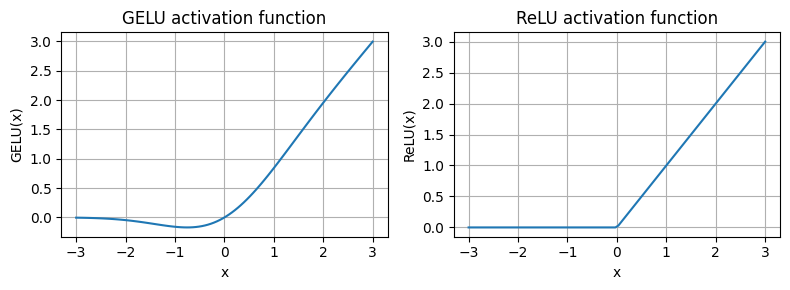

In [70]:
# plot ReLU vs GELU
import matplotlib.pyplot as plt

gelu, relu     = GELU(), nn.ReLU()
x              = torch.linspace(-3, 3, 100) #A
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)
    
plt.tight_layout()
plt.show()

- The smoothness of GELU can lead to better optimization properties during training - it allows for more nuanced adjustments to the model’s parameters. ReLU has a sharp corner at zero, which can sometimes make optimization harder, especially in networks that are very deep or have complex architectures.
- GELU returns a small, non-zero output for negative values. This means neurons that receive negative input can still contribute to the learning process, albeit to a lesser extent than positive inputs.
- Next: use GELU to build the small neural network module, FeedForward, that we will be using in the LLM’s transformer block later.

In [71]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)

- __FeedForward__ contains two Linear layers and a GELU activation function. In the 124M parameter GPT model, it receives input batches with tokens that have an embedding size of 768 each via the GPT_CONFIG_124M dictionary where GPT_CONFIG_124M["emb_dim"] = 768.

![fig4-9](px/fig4-9.png)

- Below: build a FeedForward module with a token embedding size of 768 and feed it a batch input with two samples and three tokens each.

In [72]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


- although the input and output dimensions of The FeedForward module are the same, it internally __expands the embedding dimension into a higher-
dimensional space through the first linear layer__. This is followed by a nonlinear GELU activation and then a __contraction__ back to the original dimension. This design enables exploration of a richer feature space.

![fig4-10](px/fig4-10.png)

- The uniformity in input and output dimensions also simplifies the architecture by __enabling the stacking of multiple layers__, as we will do later, without the need to adjust dimensions between them, thus making the model more scalable.

## 4.4 Adding shortcut connections
- Originally, shortcut connections (aka "skip" or "residual" connectons) were proposed for computer vision applications to mitigate the challenge of __vanishing gradients__ (the issue where gradients (which guide weight updates during training) become progressively smaller as they propagate backward through the layers, making it difficult to
effectively train earlier layers.

![fig4-12](px/fig4-12.png)

- Shortcut connections create alternative, shorter paths for the gradient to flow through the network by skipping one or more layers, which is achieved by adding the output of one layer to the output of a later layer. This is why these connections are also known as skip connections. They play a crucial role in preserving the flow of gradients during the backward pass in training.

In [73]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers       = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
        ])
        
    def forward(self, x):
        for layer in self.layers:
            layer_output = layer(x) # get output of current layer
            if self.use_shortcut and x.shape == layer_output.shape: # can shortcut be applied?
                x = x + layer_output
            else:
                x = layer_output
        return x

- Build a net __without__ shortcut connections. Each layer is designed to accept an example with three inputs & returns three outputs. The last layer returns a single output value.

In [74]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123)
model_without_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=False)

- Design a function to find backward pass gradients:

In [75]:
def print_gradients(model, x):
    
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])
    
    # Calculate loss based on how close the target and output are
    loss = nn.MSELoss()
    loss = loss(output, target)
    
    # Backward pass to calculate the gradients
    loss.backward()
    for name, param in model.named_parameters():
        if 'weight' in name:
            # Print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

- In the preceding code, we specify a loss function that computes how close the model output and a user-specified target (here, for simplicity, the value 0) are. Then, when calling loss.backward(), PyTorch computes the loss gradient for each layer in the model.
- We can iterate through the weight parameters via __model.named_parameters()__.
- Suppose we have a 3×3 weight matrix for a given layer. This layer will have 3×3 gradient values, and we print the mean absolute gradient of these 3×3 gradient values to obtain a single gradient value per layer to compare the gradients between layers more easily.
- PyTorch's __.backward()__ method computes loss gradients, which are required during model training, without implementing the math for the gradient calculation ourselves.
- Below: apply __print_gradients__ to the model without skip connections:

In [76]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173584925942123
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152040489017963
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031


- apply model __with__ skip connections for comparison:

In [77]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=True)
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169791162014008
layers.1.0.weight has gradient mean of 0.20694105327129364
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732204914093
layers.4.0.weight has gradient mean of 1.3258540630340576


- Notice the last layer (layers.4) still has a larger gradient than the other
layers. However, the __gradient stabilizes__ as we progress toward the first layer (layers.0) and doesn’t shrink to a vanishingly small value.

## 4.5 transformer blocks
- The transformer block, which is repeated a dozen times in the 124M parameter
GPT-2 architecture, combines several concepts: multi-head attention,
layer normalization, dropout, feed forward layers, and GELU activations.

![fig4-13](px/fig4-13.png)

- When a transformer processes an input sequence, each element in the sequence is represented by a fixed-size vector (in this case, 768 dimensions). The operations are designed to transform these vectors in a way that preserves their dimensionality.
- The __self-attention__ mechanism in the multi-head attention block __finds relationships between elements__ while the feed forward network modifies the data individually at each position.

In [78]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=          cfg["emb_dim"],
            d_out=         cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=     cfg["n_heads"],
            dropout=       cfg["drop_rate"],
            qkv_bias=      cfg["qkv_bias"])
        
        self.ff            = FeedForward(cfg)
        self.norm1         = LayerNorm(cfg["emb_dim"])
        self.norm2         = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        shortcut = x # shortcut for attn block
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_shortcut(x)
        x = x + shortcut # Add the original input back
        
        shortcut = x # shortcut for feed fwd block
        x        = self.norm2(x)
        x        = self.ff(x)
        x        = self.drop_shortcut(x)
        x        = x + shortcut # add back original input
        return x

- This defines a TransformerBlock class that includes a multi-head attention
mechanism (__MultiHeadAttention__) and a feed forward network (__FeedForward__).
- Layer normalization (__LayerNorm__) is applied before each of these two components, and dropout is applied afterwards to regularize the model and prevent overfitting. This is also known as Pre-LayerNorm.
- Older architectures, such as the original transformer model, applied layer normalization after the self-attention and feed forward networks instead, known as Post-LayerNorm, which often leads to worse training dynamics.
- The class also implements the __forward pass__, where each component is followed by a shortcut connection that adds the input of the block to its output.
- Below: instantiate a transformer block and feed it some sample data.

In [79]:
torch.manual_seed(123)
x      = torch.rand(2, 4, 768)
block  = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


- The preservation of shape throughout the transformer block is crucial. It enables uses across a wide range of sequence-to-sequence tasks, where each output vector directly corresponds to an input vector.
- The output is a context vector that __holds information from the entire input sequence__. This means that while the length and feature size remain unchanged, the content of each output vector is re-encoded to integrate
contextual information from across the entire input sequence.

## 4.6 Coding the GPT model
- We started with aN overview of a GPT architecture ("DummyGPTModel"). We showed the inputs and outputs, but its building blocks remained a black box using placeholder __DummyTransformerBlock__ and __DummyLayerNorm__ classes.

![fig4-15](px/fig4-15.png)

- Note how the transformer block is repeated many times throughout the model. - It’s repeated 12 times (specified by __n_layers__ in the config) in GPT-2 (124M params), and 36 times in GPT-2 with 1542M params.
- The output from the final transformer block is fed to a final layer normalization step before reaching the linear output layer. This layer maps the transformer’s output to a high-dimensional space (in this case, 50,257 dimensions, corresponding to the model’s vocabulary size) to predict the next token in the sequence.

In [80]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb    = nn.Embedding(cfg["vocab_size"],     cfg["emb_dim"])
        self.pos_emb    = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb   = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False)
    
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds          = self.tok_emb(in_idx)
        # device setting allows us to choose CPU or GPU
        pos_embeds          = self.pos_emb(
            torch.arange(seq_len, device=in_idx.device))
        
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

- Thanks to the TransformerBlock class, the GPTModel class is compact.
- __init__ initializes the token and positional embedding layers using the config dict. The embedding layers convert input token indices into dense vectors and adding positional information (see chapter 2).
- Next, __init__ creates a sequential stack of TransformerBlock modules equal to the number of layers specified in cfg.
- Then a __LayerNorm__ layer is built. It standardizes the outputs from the transformer blocks to stabilize learning.
- Finally, a __linear output head__ without bias is defined. It projects the transformer’s output into the vocabulary space of the tokenizer to generate logits for each token in the vocabulary.
- __forward__ does the following:
    1. computes their embeddings of a batch of input token indices
    2. applies the positional embeddings
    3. passes the sequence through the transformer blocks
    4. normalizes the final output
    5. computes the logits (the next token’s unnormalized probabilities)
- We will convert these logits into tokens and text outputs in the next section.
- Below: initialize the 124M param GPT model using the config dict.

In [81]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.1381,  0.0077, -0.1963,  ..., -0.0222, -0.1060,  0.1717],
         [ 0.3865, -0.8408, -0.6564,  ..., -0.5163,  0.2369, -0.3357],
         [ 0.6989, -0.1829, -0.1631,  ...,  0.1472, -0.6504, -0.0056],
         [-0.4290,  0.1669, -0.1258,  ...,  1.1579,  0.5303, -0.5549]],

        [[ 0.1094, -0.2894, -0.1467,  ..., -0.0557,  0.2911, -0.2824],
         [ 0.0882, -0.3552, -0.3527,  ...,  1.2930,  0.0053,  0.1898],
         [ 0.6091,  0.4702, -0.4094,  ...,  0.7688,  0.3787, -0.1974],
         [-0.0612, -0.0737,  0.4751,  ...,  1.2463, -0.3834,  0.0609]]],
       grad_fn=<UnsafeViewBackward0>)


- As we can see, the output tensor has the shape [2, 4, 50257]. (we passed two input texts with four tokens each.) The last dimension, 50,257, corresponds to the vocabulary size of the tokenizer.
- let’s analyze the size of the model architecture.
- __numel()__ (“number of elements”) will help.

In [82]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


- Why is the actual number of parameters 163M, not 124M?
- The reason is a concept called __weight tying__ used in the original GPT-2 architecture. It means the architecture is __reusing the weights__ from the token embedding layer in its output layer.
- To understand what this means, let’s take a look at the shapes of the token
embedding layer and linear output layer that we initialized:

In [83]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


- The token embedding and output layers are very large due to the number of rows (50,257) in
the tokenizer’s vocabulary. Let’s remove the output layer parameter count from the total GPT-2 model count according to the weight tying:

In [84]:
total_params_gpt2 = (
    total_params - sum(p.numel()
    for p in model.out_head.parameters()))
print(f"Number of trainable parameters "
f"considering weight tying: {total_params_gpt2:,}")

Number of trainable parameters considering weight tying: 124,412,160


- Now the model has 124M parameters - matching the original size.
- __Weight tying reduces memory footprint and computational complexity__.
- However, in my experience, using separate token embedding and output layers results in better training and model performance; hence, we use separate layers in our GPTModel implementation.
- The same is true for modern LLMs. However, we will revisit and implement the weight tying concept later.

- Find the memory requirements of the 163M parameters in our GPTModel
object:

In [85]:
# assumes using float32 = 4 bytes per parameter
total_size_bytes = total_params * 4
total_size_mb = total_size_bytes / (1024 * 1024)
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


## 4.7 Generating text

![fig4-16](px/fig4-16.png)

- With each iteration, the input context grows & allows the model to generate appropriate text. By the sixth iteration, the model has constructed a complete sentence: “Hello, I am a model ready to help.”
- In the previous section, we saw that our current GPTModel implementation outputs tensors with shape [batch_size, num_token, vocab_size]. So how does a GPT model go from these output tensors to the generated text?
- In each step, __the model outputs a matrix with vectors representing potential next tokens__. The vector corresponding to the next token is extracted and converted into a probability distribution via softmax function.
- Within the vector containing the resulting probability scores, __the index of the highest value is located, which translates to the token ID__. This token ID is then decoded back into text, producing the next token in the sequence.
- Finally, this token is __appended to the previous inputs__, forming a new sequence for the next iteration.

In [86]:
def generate_text_simple(
    model, idx, # array of (batch, n_tokens) indices in current context
    max_new_tokens, context_size):

    for _ in range(max_new_tokens):

        # crop current context if larger than supported context size
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)

        # focus on last time step, so (batch, n_token, vocab_size)
        # becomes (batch, vocab_size)
        logits = logits[:, -1, :]

        # probas has shape (batch, vocab_size)
        probas = torch.softmax(logits, dim=-1)

        # idx_next has shape (batch,1)
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)

        # appends sampled index to running sequence.
        # idx has shape (batch, n_tokens+1)
        idx = torch.cat((idx, idx_next), dim=1)

    return idx

- This function iterates for a specified number of new tokens to be generated,
crops the current context to fit the model’s maximum context size, computes predictions, and then selects the next token based on the highest probability prediction.
- We use softmax to convert logits into a probability distribution from which we identify the position with the highest value via __torch.argmax__. softmax is monotonic (it preserves the order of its inputs when transformed into outputs). So, in practice, the softmax step is redundant since the position with the highest score in the softmax output tensor is the same position in the logit tensor. In other words, __we could apply torch.argmax to the logits tensor directly and get identical results.
- However, this illustrates the full process of transforming logits to probabilities, which can add additional intuition so that the model generates the most likely next
token, which is known as __greedy decoding__.

In [87]:
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0) # adds batch dimension
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


- Use __.eval() mode__ which disables random components like dropout, which are only used during training, and use the __generate_text_simple__ function on the encoded input
tensor:

In [88]:
model.eval() # disables dropout, since we aren't training
out = generate_text_simple(
    model=model,
    idx=encoded_tensor,
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"])
print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267,
         49706, 43231, 47062, 34657]])
Output length: 14


- Convert the IDs back into text using __.decode__.

In [89]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am Featureiman Byeswickattribute argue logger Normandy Compton analogous


- The model generated gibberish. What happened? The reason is that we haven’t trained it yet. So far, we have designed a GPT architecture and initialized a GPT model instance with __initial random weights__. We will tackle model training in the next chapter.

# 5 Pretraining on Unlabeled Data
### WEIGHT PARAMETERS
- Weights refer to trainable (learnable) parameters. In frameworks like PyTorch, weights are stored in __linear layers__; we used these to build a __multi-head attention__ module and
the __GPTModel__ in chapter 4.
- __torch.nn.Linear(...))__ let us access its weights via __new_layer.weight__.
- PyTorch allows direct access to all a model’s trainable parameters, including
weights and biases, via __model.parameters()__.

## 5.1 Evaluating generative text models

### 5.1.1 Using GPT to generate text
- Begin by initializing a GPT model using __GPTModel__ and __GPT_CONFIG_124M__.

In [90]:
#import torch
#from chapter04 import GPTModel
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256, # shortened from 1024
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1, # common setting: 0
    "qkv_bias": False
}
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

- The only adjustment we made compared to the previous chapter is reducing the context length (context_length) to 256 tokens. This reduces the computational demands of training the model, making it possible to carry out the training on a standard laptop.
- Originally, GPT-2 with 124M params was configured to handle up to 1,024 tokens. After training we will update the context size & load pretrained weights to work with a model with a 1,024-token context length.
- Using the __GPTmodel__ instance, we adopt __generate_text_simple__ and introduce __text_to_token_ids__ and __token_ids_to_text__.

![fig5-3](px/fig5-3.png)

- This illustrates a three-step text generation process using a GPT model.
1) tokenizer converts input text into a series of token IDs (chap 2).
2) model gets token IDs and generates corresponding logits (vectors of probability
distribution for each token in the vocabulary (chap 4).
3) ogits are converted back to token IDs - the tokenizer decodes them into human-readable text.

In [91]:
import tiktoken
#from chapter04 import generate_text_simple

def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0)
    # .unsqueeze(0) adds the batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # Remove batch dimension
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer     = tiktoken.get_encoding("gpt2")
token_ids     = generate_text_simple(
    model=model, 
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you rentingetic wasnم refres RexMeCHicular stren


- It’s clear the model isn’t yet producing coherent text. To define what makes text “coherent” or “high quality,” we have to design a numerical method to evaluate the generated content. It's called a __loss_metric__.

### 5.1.2 Calculating the text generation loss
- Consider the two input examples, which have already been mapped to token IDs and matching targets (what we want the model to produce.)
- Note: targets = inputs, shifted one position forward. Crucial for prediction training.
- Feed the inputs into the model to find logits vectors. (2 x 3 tokens each.)
- Apply softmax on logits - returns prob scores (probas).

In [92]:
inputs = torch.tensor([[16833, 3626, 6100], # ["every effort moves",
                        [40, 1107, 588]]) # "I really like"]
targets = torch.tensor([[3626, 6100, 345 ], # [" effort moves you",
                        [588, 428, 11311]]) # " really like chocolate"]

In [93]:
with torch.no_grad(): # disable gradient tracking (not training yet)
    logits = model(inputs)
probas = torch.softmax(logits, dim=-1) #prob of each token in vocabulary
print(probas.shape)

torch.Size([2, 3, 50257])


- 2 = two examples in the inputs = batch size.
- 3 = number of tokens per input.
- 50257 = embedding dimension = vocabulary size.

In [94]:
token_ids = torch.argmax(probas, dim=-1, keepdim=True)
print("Token IDs:\n", token_ids)

Token IDs:
 tensor([[[16657],
         [  339],
         [42826]],

        [[49906],
         [29669],
         [41751]]])


In [95]:
# convert token IDs back to text - not yet trained, so we get random text back.
print(f"Targets batch 1: {token_ids_to_text(targets[0], tokenizer)}")
print(f"Outputs batch 1:"
    f" {token_ids_to_text(token_ids[0].flatten(), tokenizer)}")

Targets batch 1:  effort moves you
Outputs batch 1:  Armed heNetflix


![fig5-6](px/fig5-6.png)
- Text evaluation measures “how far” the tokens are from the correct predictions (targets).
Training functions use the distance to adjust model weights by increasing the softmax probability in the index positions corresponding to the correct target tokens. Softmax is also used to assess
the model’s generated outputs: the higher the probability in the correct positions, the better.
- The above figure displays __softmax values for a simple seven-token vocabulary__. This implies the starting random values will hover around 1/7 (~0.14). 
- Our GPT-2 model vocabulary has 50,257 tokens, so the initial probabilities will start at ~0.00002.
- For each of the two input texts, print the initial softmax probability scores:

In [96]:
text_idx = 0
target_probas_1 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 1:", target_probas_1)
text_idx = 1
target_probas_2 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 2:", target_probas_2)

Text 1: tensor([    0.0001,     0.0000,     0.0000])
Text 2: tensor([    0.0000,     0.0000,     0.0000])


### BACKPROPAGATION
- How do we maximize the softmax values corresponding to target tokens? The weight update is done via
__backpropagation__). It requires a loss (distance) function and the desired output.
- Let's calculate the loss for the probability scores of _target_probas_1_ and _target_probas_2_.

![fig5-7](px/fig5-7.png)

In [97]:
log_probas = torch.log(torch.cat((target_probas_1, target_probas_2)))
print(log_probas)

tensor([ -9.5042, -10.3796, -11.3677, -10.1307, -10.9951, -12.2561])


- Working with logarithms is more manageable in optimization than handling the scores directly. Combine log probabilities into a single average score:

In [98]:
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)

tensor(-10.7722)


- The goal is to get the average log probability as close to 0 as possible. The common practice isn’t to push the average log probability up to 0 but to __bring the negative average log probability down to 0__. The negative average log probability is simply the average log probability multiplied by –1.

In [99]:
neg_avg_log_probas = avg_log_probas * -1
print(neg_avg_log_probas)

tensor(10.7722)


- The term for this negative value, –10.7722, turning into 10.7722, is known as __cross entropy loss__. PyTorch already has a built-in cross_entropy function that takes care of all these six steps in figure 5.7 for us.

### CROSS ENTROPY LOSS
- Cross entropy loss __measures the difference between two probability distributions__ —typically, the
__true distribution__ of labels (tokens) and the __predicted distribution__ from a model.
- PyTorch's cross_entropy function computes this measure for __discrete outcomes__, which is similar to the __negative average log probability__ of the target tokens.

In [100]:
# review the shapes of the logits and target tensors
print("Logits shape:", logits.shape)
print("Targets shape:", targets.shape)

Logits shape: torch.Size([2, 3, 50257])
Targets shape: torch.Size([2, 3])


- For PyTorch cross_entropy loss function: flatten tensors by combining them over the batch dimension:

In [101]:
logits_flat  = logits.flatten(0, 1)
targets_flat = targets.flatten()
print("Flattened logits:", logits_flat.shape)
print("Flattened targets:", targets_flat.shape)

Flattened logits: torch.Size([6, 50257])
Flattened targets: torch.Size([6])


- Remember: the targets are the token IDs we want the LLM to generate. The logits contain
the __unscaled model outputs__ before they enter the softmax function to obtain probability scores.
- Previously, we applied softmax, selected the probability scores corresponding to the target IDs, and computed the negative average log probabilities. PyTorch’s cross_entropy function will take care of all these steps for us:

In [102]:
loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
print(loss)

tensor(10.7722)


### PERPLEXITY
- Perplexity __measures how well the probability distribution predicted by the model matches
the actual distribution of the words in the dataset__. Lower perplexity indicates that the model predictions are closer to the actual distribution.
- Perplexity can be calculated as perplexity = torch.exp(loss), which returns tensor(47678.8633)
when applied to the previously calculated loss.
- Perplexity is more interpretable than the raw loss value because __it signifies the effective vocabulary size__ about which the model is uncertain at each step. In the given example, this would translate to the model being unsure about which among 47,678 words or tokens in the vocabulary to generate as the next token.

### 5.1.3 Calculating the training and validation set losses

- To compute loss on training and validation datasets, we use again use “The Verdict” short story by Edith Wharton. Using a small dataset enables execution of code examples on a laptop computer in a matter of minutes, even without a high-end GPU.

### THE COST OF PRETRAINING LLMS

- Consider the training of the 7B parameter Llama 2 model, a relatively popular openly available LLM. It needed 184,320 GPU hours on expensive A100 GPUs, processing 2 trillion tokens. At the time of writing, running an 8 × A100 cloud server on AWS costs around $30 per hour. A rough estimate puts the total training cost of such an LLM at around $690,000 (calculated as 184,320 hours divided by 8, then multiplied by $30).

In [103]:
file_path = "the-verdict.txt"
with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.read()

total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))
print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 20480
Tokens: 5146


- Next, divide the dataset into a training and a validation set and use a data loader to prepare the batches for LLM training.

In [104]:
train_ratio = 0.90
split_idx  = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data   = text_data[split_idx:]

In [105]:
torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0)

- We __used a small batch size__ to reduce the computations because we were working with a small dataset. In practice, training LLMs with batch sizes of 1,024 or larger is common. As an optional check, we can iterate through the data loaders to ensure that they were created correctly:

In [106]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)
    
print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])


- We have __nine training set batches__ with two samples and 256 tokens each.
- Since we allocated 10% of the data for validation, there is only one validation batch consisting of two input examples.
- As expected, the input data (x) and target data (y) have the same shape (the batch size times the number of tokens in each batch) since the targets are the inputs shifted by one position, as discussed in chapter 2.
- Next: design a utility function to find the cross entropy loss of a given batch returned via the training and validation loader:

In [107]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch  = input_batch.to(device)
    target_batch = target_batch.to(device)
    logits       = model(input_batch)
    loss         = torch.nn.functional.cross_entropy(
        logits.flatten(0, 1), 
        target_batch.flatten())
    return loss

- We can now use __calc_loss_batch__ to compute the loss for a single batch.

In [108]:
def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:

        # iterates over all batches, if num_batches isn't specified.
        num_batches = len(data_loader)
    else:
        # reduces #batches to match #batches in the loader, if #batches > #batches in the loader.
        num_batches = min(num_batches, len(data_loader))
        
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches # average loss across all batches

In [109]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

with torch.no_grad(): # disable gradient tracking (not training yet)
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss   = calc_loss_loader(  val_loader, model, device)
    
print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.987583584255642
Validation loss: 10.983160018920898


- The losses are high because the model has not been trained. For comparison, the
loss approaches 0 if the model learns to generate the next tokens as they appear in the training and
validation sets.

## 5.2 Training an LLM
![fig5-11](px/fig5-11.png)

In [110]:
def train_model_simple(
    model, train_loader, val_loader,
    optimizer, device, num_epochs,
    eval_freq, eval_iter, start_context, tokenizer):

    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step                    = 0, -1

    for epoch in range(num_epochs):
        model.train()
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()               # resets loss gradients from previous epoch
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward()                     # find loss gradient
            optimizer.step()                    # update model weights using loss gradients
            tokens_seen += input_batch.numel()
            global_step += 1

            if global_step % eval_freq == 0:    # optional evaluation step

                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)

                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)

                print(
                    f"Ep {epoch+1} (Step {global_step:06d}): "
                    f"Train loss   {train_loss:.3f}, "
                    f"Val loss     {val_loss:.3f}"
                )
        generate_and_print_sample(model, tokenizer, device, start_context)
    return train_losses, val_losses, track_tokens_seen

- __evaluate_model__ corresponds to step 7 above. It prints the training & validation set losses after each model update so we can evaluate whether the training improves the model.

In [111]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval() # dropout disabled during evaluation for stable results.
    with torch.no_grad(): # gradient tracking disabled (not required during evaluation).
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss   = calc_loss_loader(  val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

- __generate_and_print_sample__ tracks whether the model improves during training. It converts a text snippet (start_context) into token IDs & feeds it to the LLM to generate a text sample using __generate_text_simple__.

In [112]:
def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded      = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model, 
            idx=encoded,
            max_new_tokens=50, 
            context_size=context_size)
        
        decoded_text = token_ids_to_text(token_ids, tokenizer)
        print(decoded_text.replace("\n", " "))
    model.train()

### ADAMW
- Adam optimizers are a popular choice for training deep neural networks. __AdamW__ is a variant of Adam that __improves the weight decay approach__ to minimize model complexity and prevent overfitting by penalizing larger weights. This allows AdamW to achieve more effective regularization and better generalization; thus, AdamW is frequently used in the training of LLMs.

In [113]:
torch.manual_seed(123)

# takes ~5 mins to finish to typical MacBook

model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=0.0004, 
    weight_decay=0.1)

num_epochs = 10
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, 
    eval_freq=5, 
    eval_iter=1,
    start_context="Every effort moves you", 
    tokenizer=tokenizer)

/home/bjpcjp/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ep 1 (Step 000000): Train loss   9.830, Val loss     9.927
Ep 1 (Step 000005): Train loss   8.133, Val loss     8.335
Every effort moves you,,,,,,,,,,,,.                                     
Ep 2 (Step 000010): Train loss   6.770, Val loss     7.048
Ep 2 (Step 000015): Train loss   6.497, Val loss     6.573
Every effort moves you, and,, and, and,,,,, and, and,,,,,,,,,,,,,, and,,,, and,, and,,,,, and,,,,,,
Ep 3 (Step 000020): Train loss   5.579, Val loss     6.492
Ep 3 (Step 000025): Train loss   4.732, Val loss     6.387
Every effort moves you, and to the picture.                      "I, and the of the of the's the honour, and, and I had been, and I
Ep 4 (Step 000030): Train loss   5.284, Val loss     6.361
Ep 4 (Step 000035): Train loss   3.855, Val loss     6.258
Every effort moves you of the to the picture--as of the picture--as I had been " it was his " I was the     "I was his I had been the his pictures--and it the picture and I had been the picture of
Ep 5 (Step 000040): Train 

- The training loss improves drastically. The language skills of the model also improved. In the beginning, the model is only able to append commas to the start context (Every effort moves you,,,,,,,,,,,,) or repeat the word and. By the end it can generate grammatically correct text.
- Plot the training & validation losses:

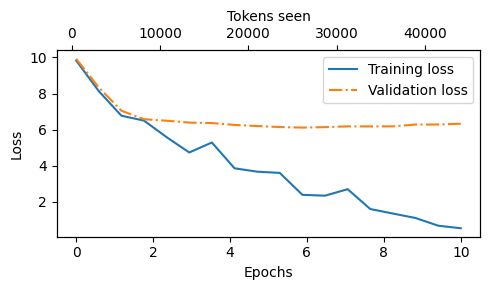

In [114]:
import matplotlib.pyplot as plt
def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))
    ax1.plot(epochs_seen, train_losses,               label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax2 = ax1.twiny()                            # creates second x-axis; shares same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0) # invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")
    fig.tight_layout()
    plt.show()
    
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

- The training and validation losses improve during the first epoch, but diverge past the second epoch. This __divergence and the fact that the validation loss is much larger than the training loss indicate that the model is overfitting__ to the training data.
- We can confirm that the model is memorizing the training data by searching for the generated text snippets. This is expected - we are using a very small training dataset and training the model for multiple epochs. __Usually, it’s common to train a model on a much larger dataset for only one epoch.__

## 5.3 Decoding strategies to control randomness
- Begin by transferring the model back from the GPU to the CPU since inference with a
relatively small model does not require a GPU. Also, after training, we put the model into evaluation
model to turn off random components such as dropout.

In [115]:
model.to("cpu")
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

- Plug the GPT model instance into __generate_text_simple__, which uses the LLM to generate one token at a time.

- The generated token is selected at each generation step based on the largest probability score among all tokens in the vocabulary. This means the LLM will generate the same outputs even if we run  __generate_text_simple__ multiple times on the same start context (Every effort moves you).

In [116]:
tokenizer = tiktoken.get_encoding("gpt2")
token_ids = generate_text_simple(
    model         = model,
    idx           = text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens= 25,
    context_size  = GPT_CONFIG_124M["context_length"])

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you?"

"Yes--quite insensible to the irony. She wanted him vindicated--and by me!"




### 5.3.1 Temperature scaling (TS)
- TS adds a probabilistic selection process to the next-token generation task.
- Previously, __generate_text_simple__ always sampled the token with the highest probability as the next token using __torch.argmax__ (aka "__greedy decoding__").
- We can replace argmax with a sampling function.

In [117]:
vocab = {
"closer": 0,
"every": 1,
"effort": 2,
"forward": 3,
"inches": 4,
"moves": 5,
"pizza": 6,
"toward": 7,
"you": 8,
}
inverse_vocab = {v: k for k, v in vocab.items()}

- Assume the LLM is given "every effort moves you" and geneates the following next-token logits.

In [118]:
next_token_logits = torch.tensor(
[4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

- __generate_text_simple__ converts logits into probabilities via softmax function and gets the token ID corresponding to the generated token via __argmax__, which we can map back into text via the inverse vocabulary.
- Since the largest logit value, and correspondingly the largest softmax score, is in the fourth position (index position 3 since Python uses 0 indexing), the generated word is 'forward'.

In [119]:
probas        = torch.softmax(next_token_logits, dim=0)
next_token_id = torch.argmax(probas).item()

print(inverse_vocab[next_token_id])

forward


- Now replace argmax with PyTorch's __multinomial function__.

In [120]:
torch.manual_seed(123)
next_token_id = torch.multinomial(probas, num_samples=1).item()
print(inverse_vocab[next_token_id])

toward


- __multinomial__ samples the next token proportional to its probability score. In other words, "forward" is still the most likely token and will be selected by multinomial most of the time but not all the time. To illustrate this, let’s implement a function that repeats this sampling 1,000 times:

In [121]:
def print_sampled_tokens(probas):
    torch.manual_seed(123)
    sample = [torch.multinomial(probas, num_samples=1).item()
        for i in range(1_000)]
    sampled_ids = torch.bincount(torch.tensor(sample))
    for i, freq in enumerate(sampled_ids):
        print(f"{freq} x {inverse_vocab[i]}")
print_sampled_tokens(probas)

71 x closer
2 x every
0 x effort
544 x forward
2 x inches
1 x moves
0 x pizza
376 x toward
4 x you


- We can control the distribution and selection process via temperature scaling. This is just a fancy description for dividing the logits by a number greater than 0.
- Temperatures __greater than 1 return more uniformly distributed token probabilities__.
- Temperatures __smaller than 1 return more confident (sharper or more peaky) distributions__.

In [122]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

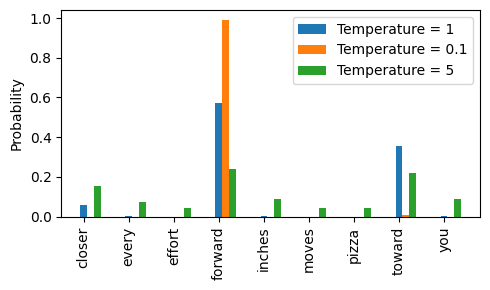

In [123]:
temperatures  = [1, 0.1, 5]
scaled_probas = [softmax_with_temperature(next_token_logits, T)
    for T in temperatures]
x = torch.arange(len(vocab))
bar_width = 0.15
fig, ax = plt.subplots(figsize=(5, 3))

for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i],
    bar_width, label=f'Temperature = {T}')

ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

- A temperature of 1 divides the logits by 1 before passing them to the softmax function to compute
the probability scores. (In other words, temperature of 1 is the same as not using any
temperature scaling.)
- In this case, the tokens are selected with a probability equal to the original softmax probability scores via PyTorch's multinomial sampling function.
- For a temperature setting of 1, the token corresponding to “forward” would be selected about 60% of the time.
- Applying small temperatures such as 0.1 returns "sharper" distributions - the multinomial function selects "forward") almost 100% of the time - approaching the behavior of the argmax function.
- A temperature of 5 results in a __more uniform distribution__. This can add variety to the generated texts but can return nonsensical text.

### 5.3.2 Top-k sampling
- Temperature scaling can return nonsensical outputs. Top-k sampling, when combined with
probabilistic sampling and temperature scaling, can improve  text generation results.
- Top-k sampling __restricts the sampled tokens to the top-k most likely tokens__ & excludes all others.

![fig5-15](px/fig5-15.png)

In [124]:
top_k = 3
top_logits, top_pos = torch.topk(next_token_logits, top_k)
print("Top logits:", top_logits)
print("Top positions:", top_pos)

Top logits: tensor([6.7500, 6.2800, 4.5100])
Top positions: tensor([3, 7, 0])


In [125]:
# get next-token logits in this nine-token vocabulary
new_logits = torch.where(
    condition = next_token_logits < top_logits[-1],
    input     = torch.tensor(float('-inf')),
    other     = next_token_logits)
print(new_logits)

tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])


In [126]:
# apply softmax to get next-token probabilities
topk_probas = torch.softmax(new_logits, dim=0)
print(topk_probas)

tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])


### 5.3.3 Modifying the text generation function
- The previous two sections introduced temperature sampling and top-k sampling. Now modify the __generate_simple__ into a new __generate__ function.

In [127]:
def generate(model, idx, max_new_tokens, 
             context_size, 
             temperature=0.0, 
             top_k=None,
             eos_id=None): # eos_id missing from book v7 code listing, but in github.
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        
        logits = logits[:, -1, :]
        if top_k is not None:              # filter logits with top_k sampling
            top_logits, _ = torch.topk(logits, top_k)
            min_val       = top_logits[:, -1]
            logits        = torch.where(
                logits < min_val,
                torch.tensor(float('-inf')).to(logits.device),
                logits)

        if temperature > 0.0:
            logits   = logits / temperature
            probs    = torch.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)

        if idx_next == eos_id:
            break
        idx = torch.cat((idx, idx_next), dim=1)
    return idx

In [128]:
torch.manual_seed(123)
token_ids = generate(
    model          = model,
    idx            = text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens = 15,
    context_size   = GPT_CONFIG_124M["context_length"],
    top_k          = 25,
    temperature    = 1.4)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you know began to my surprise, a little it was the
"Ah enough


### 5.4 Loading and saving model weights in PyTorch
- Pretraining even small LLMs is expensive. Thus, we want to save the LLM so that we don’t have to rerun the training every time we want to use it in a new session.
- Saving a PyTorch model is straightforward. The recommended way is to save a model’s __state_dict__, a dictionary mapping each layer to its parameters, using __torch.save__.
- After saving the model weights we can load them into a new GPTModel model instance.

In [129]:
torch.save(model.state_dict(), "my_model.pth")

In [130]:
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(torch.load("my_model.pth"))
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

- Recall how dropout helps prevent overfitting by randomly “dropping out” of a layer’s neurons during training. We don’t want to lose any learned information during inference. __model.eval()__ switches the model to evaluation mode for inference, disabling the dropout layers of the model.
- __If we plan to continue pretraining a model later__ — for example, using  __train_model_simple__
— we should also save the optimizer state.
- Adaptive optimizers such as __AdamW__ store additional parameters for each model weight. AdamW
uses historical data to adjust learning rates for each model parameter dynamically. Without it, the
optimizer resets, and the model may learn suboptimally or even fail to converge properly, which
means it will lose the ability to generate coherent text. Using __torch.save__, we can save both the
model and optimizer state_dict contents as follows.

In [131]:
torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    },
    "model_and_optimizer.pth")

- Then we can restore the model and optimizer states by loading the saved data via
__torch.load__, then using __load_state_dict__.

In [132]:
checkpoint = torch.load("model_and_optimizer.pth")
model      = GPTModel(GPT_CONFIG_124M)

model.load_state_dict(checkpoint["model_state_dict"])
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
model.train();

## 5.5 Loading pretrained weights from OpenAI
- We trained a small GPT-2 model using a limited dataset. This allowed us to focus on the fundamentals without the need for extensive time and computational resources.
- OpenAI shared the weights of their GPT-2 models, thus eliminating the need for retraining.
- OpenAI originally saved the GPT-2 weights via TensorFlow, which we have to install to
load the weights in Python. The following code will use a __progress bar tool called tqdm__ to
track the download process, which we also have to install.

In [133]:
!pip install tensorflow>=2.15.0 tqdm>=4.66

- The download code is relatively long, mostly boilerplate, and not very interesting. Download the gpt_download.py Python module directly from this chapter’s online repository:

In [134]:
import urllib.request
url = ("https://raw.githubusercontent.com/rasbt/"
       "LLMs-from-scratch/main/ch05/"
       "01_main-chapter-code/gpt_download.py"
)
filename = url.split('/')[-1]
urllib.request.urlretrieve(url, filename)

('gpt_download.py', <http.client.HTTPMessage at 0x7c0e93b67d40>)

- Inspect the contents of this file to ensure that it was saved correctly and contains valid Python code.
- Import the __download_and_load_gpt2__ function from the gpt_download.py file as follows, which will load the GPT-2 architecture settings (settings) and weight parameters (params) into our Python session:

In [135]:
from gpt_download import download_and_load_gpt2
settings, params = download_and_load_gpt2(
    model_size="124M", 
    models_dir="gpt2")

2024-07-02 09:13:15.529254: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-02 09:13:15.745602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 09:13:15.826039: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 09:13:15.826652: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-02 09:13:15.963209: I tensorflow/core/platform/cpu_feature_gua

File already exists and is up-to-date: gpt2/124M/checkpoint
File already exists and is up-to-date: gpt2/124M/encoder.json
File already exists and is up-to-date: gpt2/124M/hparams.json
File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/124M/model.ckpt.index
File already exists and is up-to-date: gpt2/124M/model.ckpt.meta
File already exists and is up-to-date: gpt2/124M/vocab.bpe


- inspect the contents of settings and params. Both are Python dictionaries.
- __settings__ stores the LLM architecture settings similarly to our manually defined GPT_CONFIG_124M settings. __params__ contains the actual weight tensors.
- We only printed the dictionary keys because printing the weight contents would take up too much screen space. We can inspect these weight tensors by printing the whole dictionary via __print(params)__ or by selecting individual tensors via the respective dictionary keys, for example, the embedding layer weights.
- We're using the weights of the smallest GPT-2 model via the download_and_load_gpt2(model_size="124M", ...) setting. OpenAI also shares the weights of larger models: 355M, 774M, and 1558M. The overall architecture of these differently sized GPT models is the same, as illustrated in figure 5.17.

In [136]:
print("Settings:", settings)
print("Parameter dictionary keys:", params.keys())

Settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Parameter dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [137]:
print(params["wte"])
print("Token embedding weight tensor dimensions:", params["wte"].shape)

[[-0.11010301 -0.03926672  0.03310751 ... -0.1363697   0.01506208
   0.04531523]
 [ 0.04034033 -0.04861503  0.04624869 ...  0.08605453  0.00253983
   0.04318958]
 [-0.12746179  0.04793796  0.18410145 ...  0.08991534 -0.12972379
  -0.08785918]
 ...
 [-0.04453601 -0.05483596  0.01225674 ...  0.10435229  0.09783269
  -0.06952604]
 [ 0.1860082   0.01665728  0.04611587 ... -0.09625227  0.07847701
  -0.02245961]
 [ 0.05135201 -0.02768905  0.0499369  ...  0.00704835  0.15519823
   0.12067825]]
Token embedding weight tensor dimensions: (50257, 768)


![fig5-17](px/fig5-17.png)

- After loading the GPT-2 model weights into Python, we still need to transfer them from the
settings and params dictionaries into our GPTModel instance. First, we __create a dictionary that lists the differences between the different GPT model sizes__.

In [138]:
model_configs = {
"gpt2-small (124M)":  {"emb_dim":  768, "n_layers": 12, "n_heads": 12},
"gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
"gpt2-large (774M)":  {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
"gpt2-xl (1558M)":    {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

- Suppose we are interested in loading the smallest model, "gpt2-small (124M)". We can use __model_configs__ to update our full-length GPT_CONFIG_124M we defined and used earlier throughout the chapter as follows:

In [139]:
model_name = "gpt2-small (124M)"
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])

- Recall that we used a 256-token length earlier, but the original GPT-2
models from OpenAI were trained with a 1,024-token length, so we have to update the
NEW_CONFIG accordingly:

In [140]:
NEW_CONFIG.update({"context_length": 1024})

- __OpenAI used bias vectors in the multi-head attention module’s linear layers__ to implement the
query, key, and value matrix computations. Bias vectors are not commonly used in LLMs anymore
as they don’t improve the modeling performance and are thus unnecessary.
- However, since we are working with pretrained weights, __we need to match the settings for consistency and enable these bias vectors__:

In [141]:
NEW_CONFIG.update({"qkv_bias": True})

- Now use the updated NEW_CONFIG dictionary to initialize a new GPTModel instance:

In [142]:
gpt = GPTModel(NEW_CONFIG)
gpt.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

- By default, the GPTModel instance is initialized with random weights for pretraining. The last step to
using OpenAI’s model weights is to __override these random weights with the weights we loaded into
the params dictionary__.
- We will need a utility function that checks whether two tensors or arrays (left and right) have the same dimensions or shape and returns the right tensor as trainable PyTorch parameters:

In [143]:
def assign(left, right):
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left: {left.shape}, ""Right: {right.shape}")
    return torch.nn.Parameter(torch.tensor(right))

- define a __load_weights_into_gpt__ function that loads the weights from the params dictionary
into a GPTModel instance gpt.

In [144]:
import numpy as np

def load_weights_into_gpt(gpt, params):
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params['wpe'])
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params['wte'])
    
    for b in range(len(params["blocks"])):
        q_w, k_w, v_w = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        
        gpt.trf_blocks[b].att.W_query.weight = assign(
            gpt.trf_blocks[b].att.W_query.weight, q_w.T)
        
        gpt.trf_blocks[b].att.W_key.weight = assign(
            gpt.trf_blocks[b].att.W_key.weight, k_w.T)
        
        gpt.trf_blocks[b].att.W_value.weight = assign(
            gpt.trf_blocks[b].att.W_value.weight, v_w.T)
        
        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        
        gpt.trf_blocks[b].att.W_query.bias = assign(
            gpt.trf_blocks[b].att.W_query.bias, q_b)
        
        gpt.trf_blocks[b].att.W_key.bias = assign(
            gpt.trf_blocks[b].att.W_key.bias, k_b)
        
        gpt.trf_blocks[b].att.W_value.bias = assign(
            gpt.trf_blocks[b].att.W_value.bias, v_b)
        
        gpt.trf_blocks[b].att.out_proj.weight = assign(
            gpt.trf_blocks[b].att.out_proj.weight,
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        
        gpt.trf_blocks[b].att.out_proj.bias = assign(
            gpt.trf_blocks[b].att.out_proj.bias,
            params["blocks"][b]["attn"]["c_proj"]["b"])
        
        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight,
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias,
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight,
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias,
            params["blocks"][b]["mlp"]["c_proj"]["b"])
        
        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale,
            params["blocks"][b]["ln_1"]["g"])
        
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift,
            params["blocks"][b]["ln_1"]["b"])
        
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale,
            params["blocks"][b]["ln_2"]["g"])
        
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift,
            params["blocks"][b]["ln_2"]["b"])
        
    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
    gpt.out_head.weight  = assign(gpt.out_head.weight, params["wte"])

- Here we match the weights from OpenAI’s implementation to our GPTModel implementation.
- Example: OpenAI stored the weight tensor for the output projection layer for the first transformer block as __params["blocks"][0]["attn"]["c_proj"]["w"]__. In our implementation, this tensor corresponds to
__gpt.trf_blocks[b].att.out_proj.weight__, where gpt is a GPTModel instance.
- Developing this function took a lot of guesswork - OpenAI used a slightly different naming convention from ours. However, the assign function would alert us if we try to match two tensors with different dimensions. Also, if we made a mistake in this function, we would notice this, as the resulting GPT model would be unable to produce coherent text.
- Launch __load_weights_into_gpt__ & load the OpenAI model weights into our GPTModel instance gpt:

In [145]:
load_weights_into_gpt(gpt, params)
gpt.to(device)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

- If the model is loaded correctly, we can now use it to generate new text using our previous generate
function:

In [146]:
torch.manual_seed(123)
token_ids = generate(
    model          = gpt,
    idx            = text_to_token_ids("Every effort moves you", tokenizer).to(device),
    max_new_tokens = 25,
    context_size   = NEW_CONFIG["context_length"],
    top_k          = 50,
    temperature    = 1.5)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you toward an equal share for each vote plus half. Inequality is often not an accurate representation of human worth; to know the


# 6 Finetuning for Classication

## 6.1 Different categories of finetuning
![fig6-2](px/fig6-2.png)

- The most common ways to finetune language models are __instruction-finetuning__ and __classification-
finetuning__. Instruction-finetuning involves training a language model on a set of tasks using specific
instructions to improve its ability to understand and execute tasks described in natural language
prompts.

- In __classification-finetuning__, the model is trained to recognize a specific set of class labels, such as "spam" and "not spam." classification-finetuned models are __restricted to predicting classes it has encountered during its training__ — but it can't say anything else about the input text.

- an __instruction-finetuned__ model typically can undertake a broader range of tasks. We can view a
classification-finetuned model as highly specialized, and generally, it is easier to develop a
specialized model than a generalist model that works well across various tasks.

## 6.2 Preparing the dataset
- To provide an intuitive and useful example of classification-finetuning, we will work with a text
message dataset with spam and non-spam messages.

In [147]:
import urllib.request
import zipfile
import os
from pathlib import Path

url            = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path       = "sms_spam_collection.zip"
extracted_path = "sms_spam_collection"
data_file_path = Path(extracted_path) / "SMSSpamCollection.tsv"

def download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path):
    if data_file_path.exists():
        print(f"{data_file_path} already exists. Skipping download and extraction.")
        return

    with urllib.request.urlopen(url) as response:
        with open(zip_path, "wb") as out_file:
            out_file.write(response.read())

    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extracted_path)

    original_file_path = Path(extracted_path) / "SMSSpamCollection"
    os.rename(original_file_path, data_file_path)
    print(f"File downloaded and saved as {data_file_path}")

download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path)

sms_spam_collection/SMSSpamCollection.tsv already exists. Skipping download and extraction.


In [148]:
# load into pandas dataframe
import pandas as pd
df = pd.read_csv(data_file_path, sep="\t", header=None, names=["Label", "Text"])
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [150]:
# review the class label distribution
print(df["Label"].value_counts())

Label
ham     4825
spam     747
Name: count, dtype: int64


- We will undersample the dataset to include 747 instances from each class for simplicity. While there are several other methods to handle class imbalances, these are beyond the scope of a book on large language models.

In [151]:
def create_balanced_dataset(df):
    num_spam    = df[df["Label"] == "spam"].shape[0]
    ham_subset  = df[df["Label"] == "ham"].sample(
        num_spam, 
        random_state=123)
    balanced_df = pd.concat(
        [ham_subset, 
         df[df["Label"] == "spam"]])
    return balanced_df
balanced_df = create_balanced_dataset(df)
print(balanced_df["Label"].value_counts())

Label
ham     747
spam    747
Name: count, dtype: int64


In [152]:
# convert class labels to integers (0 and 1)
balanced_df["Label"] = balanced_df["Label"].map({"ham": 0, "spam": 1})

- This is similar to converting text into token IDs. However, instead of using the GPT vocabulary, which consists of more than 50,000 words, we are dealing with just two token IDs: 0 and 1.
- Create a random_split function to split the dataset into three parts: 70% for training, 10% for validation, and 20% for testing. (These ratios are common in machine learning to train, adjust, and evaluate models.)

In [153]:
def random_split(df, train_frac, validation_frac):
    df             = df.sample(frac=1, random_state=123).reset_index(drop=True) #A
    train_end      = int(len(df) * train_frac)
    validation_end = train_end + int(len(df) * validation_frac)
    
    train_df      = df[:train_end]
    validation_df = df[train_end:validation_end]
    test_df       = df[validation_end:]

    return train_df, validation_df, test_df

train_df, validation_df, test_df = random_split(balanced_df, 0.7, 0.1) #D

In [154]:
# save dataset as CSV for later reuse
train_df.to_csv("train.csv", index=None)
validation_df.to_csv("validation.csv", index=None)
test_df.to_csv("test.csv", index=None)

## 6.3 Creating data loaders
- Previously we used a sliding window to generate uniformly sized text
chunks, which were then grouped into batches for more efficient model training. Each chunk functioned as an individual training instance.
- Now we are working with a spam dataset that contains text messages of
varying lengths. To batch these messages as we did with the text chunks, we have two options:
    1.__Truncate__ all messages to the length of the shortest message in the dataset or batch.
    2. __Pad__ all messages to the length of the longest message in the dataset or batch.
- Option 1 is computationally cheaper, but it may result in significant information loss if shorter messages are much smaller than the average or longest messages, potentially reducing model performance. So, we opt for the second option, which preserves the entire content of all messages.

- To implement option 2, we __add padding tokens__ ("<|endoftext|>") to all shorter messages. Instead of appending the string "<|endoftext|>" to each of the text messages, we can add the corresponding token ID.

- We assume 50,256 is the token ID of the padding token "<|endoftext|>". We can double-check that this by encoding the "<|endoftext|>" using the
GPT-2 tokenizer from the tiktoken package.

In [155]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
print(tokenizer.encode("<|endoftext|>", allowed_special={"<|endoftext|>"}))

[50256]


- We need to design a __PyTorch Dataset__, which specifies how the data is loaded and processed, before we can instantiate the data loaders.
- Define a __SpamDataset__ class to handle several key tasks:
    - identify the longest sequence in the training dataset
    - encode the text messages
    - ensure all other sequences are padded with a padding token to match the length of the longest sequence.

In [156]:
import torch
from torch.utils.data import Dataset

class SpamDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length=None, pad_token_id=50256):
        
        self.data = pd.read_csv(csv_file)
        
        self.encoded_texts = [
            tokenizer.encode(text) for text in self.data["Text"]]

        if max_length is None:
            self.max_length = self._longest_encoded_length()
        else:
            self.max_length = max_length
            self.encoded_texts = [
                encoded_text[:self.max_length]
                for encoded_text in self.encoded_texts]

        self.encoded_texts = [
            encoded_text + [pad_token_id] * (self.max_length - len(encoded_text))
            for encoded_text in self.encoded_texts]
        
    def __getitem__(self, index):
        encoded = self.encoded_texts[index]
        label = self.data.iloc[index]["Label"]
        return (
            torch.tensor(encoded, dtype=torch.long),
            torch.tensor(label, dtype=torch.long))

    def __len__(self):
        return len(self.data)

    def _longest_encoded_length(self):
        max_length = 0
        for encoded_text in self.encoded_texts:
            encoded_length = len(encoded_text)
            if encoded_length > max_length:
                max_length = encoded_length
        return max_length

- __SpamDataset__ loads data from the CSV files we created earlier, tokenizes the text using the GPT-2 tokenizer from tiktoken and allows us to pad or truncate the sequences to a uniform length determined by either the longest sequence or a predefined maximum length. This ensures each
input tensor is of the same size, which is necessary to create the batches in the training data loader we implement next:

In [157]:
train_dataset = SpamDataset(
    csv_file="train.csv",
    max_length=None,
    tokenizer=tokenizer)

- The longest sequence length is stored in the __max_length__ attribute.

In [158]:
print(train_dataset.max_length)

120


- 120 tokens is a common length for text messages. The model can handle sequences of up to 1,024 tokens, given its context length limit. If your dataset includes longer texts, you can pass __max_length=1024__ when creating the training dataset.
- Next: __pad the validation and test sets__ to match the length of the longest training sequence. Any validation and test set samples exceeding the length of the longest training example are truncated using encoded_text[:self.max_length] in the SpamDataset code we defined earlier. This truncation is optional; you could also set max_length=None for both validation
and test sets, provided there are no sequences exceeding 1,024 tokens in these sets.

In [159]:
val_dataset = SpamDataset(
    csv_file="validation.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer)

test_dataset = SpamDataset(
    csv_file="test.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer)

- Using the datasets as inputs, we can instantiate the data loaders similarly to what we did in chapter
2. However, in this case, the targets represent class labels rather than the next tokens in the text.
For instance, choosing a batch size of 8, each batch will consist of 8 training examples of length 120
and the corresponding class label of each example, as illustrated in figure 6.7.

![fig6-7](px/fig6-7.png)

- Next: Create the training, validation, and test set data loaders that load the text messages and labels in batches of size 8.

In [160]:
from torch.utils.data import DataLoader
num_workers = 0
batch_size = 8
torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, drop_last=True)

val_loader = DataLoader(
    dataset=val_dataset,   batch_size=batch_size,               num_workers=num_workers, drop_last=False)

test_loader = DataLoader(
    dataset=test_dataset,  batch_size=batch_size,               num_workers=num_workers, drop_last=False)

- Verify the data loaders are working & returning batches of the expected size - iterate over the training loader and then print the tensor dimensions of the last batch.

In [163]:
for input_batch, target_batch in train_loader:
    pass
print("Input batch dimensions:", input_batch.shape)
print("Label batch dimensions", target_batch.shape)

print("Input batch dimensions:", torch.Size([8, 120]))
print("Label batch dimensions:", torch.Size([8]))

Input batch dimensions: torch.Size([8, 120])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 120])
Label batch dimensions: torch.Size([8])


- The input batches consist of 8 training examples with 120 tokens each, as expected. The label tensor stores the class labels corresponding to the 8 training examples.
- Verify the dataset size using the total number of batches in each dataset:

In [164]:
print(f"{len(train_loader)} training batches")
print(f"{len(val_loader)} validation batches")
print(f"{len(test_loader)} test batches")

130 training batches
19 validation batches
38 test batches


## 6.4 Initializing a model with pretrained weights

![fig6-8](px/fig6-8.png)

- Reuse the configurations from chapter 5:

In [165]:
CHOOSE_MODEL = "gpt2-small (124M)"
INPUT_PROMPT = "Every effort moves"

BASE_CONFIG = {
    "vocab_size": 50257,# Vocabulary size
    "context_length": 1024,# Context length
    "drop_rate": 0.0,# Dropout rate
    "qkv_bias": True# Query-key-value bias
    }

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
    }

BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

assert train_dataset.max_length <= BASE_CONFIG["context_length"], (
    f"Dataset length {train_dataset.max_length} exceeds model's context "
    f"length {BASE_CONFIG['context_length']}. Reinitialize data sets with "
    f"`max_length={BASE_CONFIG['context_length']}`"
    )

- import __download_and_load_gpt2__ from __gpt_download.py__; reuse the __GPTModel__ class and
__load_weights_into_gpt__ from chapter 5 to load the downloaded weights into the GPT model:

In [167]:
from gpt_download import download_and_load_gpt2
#from chapter05 import GPTModel, load_weights_into_gpt

model_size       = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")
settings, params = download_and_load_gpt2(model_size=model_size, models_dir="gpt2")
model            = GPTModel(BASE_CONFIG)

load_weights_into_gpt(model, params)
model.eval()

File already exists and is up-to-date: gpt2/124M/checkpoint
File already exists and is up-to-date: gpt2/124M/encoder.json
File already exists and is up-to-date: gpt2/124M/hparams.json
File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/124M/model.ckpt.index
File already exists and is up-to-date: gpt2/124M/model.ckpt.meta
File already exists and is up-to-date: gpt2/124M/vocab.bpe


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

- After loading the model weights into GPTModel, use the text generation utility function to ensure that the model generates coherent text:

In [168]:
#from chapter04 import generate_text_simple
#from chapter05 import text_to_token_ids, token_ids_to_text

text_1 = "Every effort moves you"
token_ids = generate_text_simple(
    model          = model,
    idx            = text_to_token_ids(text_1, tokenizer),
    max_new_tokens = 15,
    context_size   = BASE_CONFIG["context_length"])

print(token_ids_to_text(token_ids, tokenizer))

Every effort moves you forward.

The first step is to understand the importance of your work


- Before we start finetuning the model as a spam classifier, let's see if the model can already classify spam messages by prompting it with instructions:

In [169]:
text_2 = (
"Is the following text 'spam'? Answer with 'yes' or 'no':"
" 'You are a winner you have been specially"
" selected to receive $1000 cash or a $2000 award.'"
)
token_ids = generate_text_simple(
    model          = model,
    idx            = text_to_token_ids(text_2, tokenizer),
    max_new_tokens = 23,
    context_size   = BASE_CONFIG["context_length"])

print(token_ids_to_text(token_ids, tokenizer))

Is the following text 'spam'? Answer with 'yes' or 'no': 'You are a winner you have been specially selected to receive $1000 cash or a $2000 award.'

The following text 'spam'? Answer with 'yes' or 'no': 'You are a winner


- The model still struggles with following instructions. This isn't a surprise - it has undergone only pretraining and lacks instruction-finetuning.

## 6.5 Adding a classification head

- In this section, we modify the pretrained LLM to prepare it for classification-finetuning by replacing the original output layer, which maps the hidden representation to a vocabulary of 50,257, with a __smaller output layer that maps to two classes__: 0 ("not spam") and 1 ("spam").

![fig6-9](px/fig6-9.png)

### OUTPUT LAYER NODES
- We __could technically use a single output node__ since we are dealing with a binary classification task. However, this __would require modifying the loss function__. (see Reference section in appendix B.)
- Therefore, we choose a more general approach where the number of output nodes matches the number of classes. For example,
for a 3-class problem, such as classifying news articles as "Technology", "Sports", or "Politics", we would use three output nodes, and so forth.

- First, let's print the model architecture via __print(model)__.

In [170]:
print(model)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

### FINETUNING SELECTED LAYERS VERSUS ALL LAYERS
- Since we start with a pretrained model, __it's not necessary to finetune all model layers__. The lower layers generally capture basic language structures and semantics that are applicable across a wide range of tasks and
datasets. Finetuning only the last layers (layers near the output), which are more specific task-specific features, can often be sufficient.
- A __nice side effect__ is that it is computationally more efficient to finetune only a small number of layers. See more info in the __References section in appendix B__.

- To get the model ready for classification-finetuning, we __first freeze the model__, (making all layers non-trainable):

In [171]:
for param in model.parameters():
    param.requires_grad = False

- replace the output layer (__model.out_head__), which originally maps the layer inputs to 50,257 dimensions (the size of the vocabulary).
- Note: we use BASE_CONFIG["emb_dim"] (768 in the "gpt2-small (124M)" model) to keep the code more general. This means we can also use the same code to work with the larger GPT-2 model variants.

In [172]:
torch.manual_seed(123)
num_classes = 2
model.out_head = torch.nn.Linear(
in_features=BASE_CONFIG["emb_dim"],
out_features=num_classes
)

- This __model.out_head__ output layer has __requires_grad attribute set to True by default__ - so it's the only layer that will be updated during training.
- Technically, training the output layer we just added is sufficient. However, as I found in experiments, __finetuning additional layers can noticeably improve the predictive performance__ of the finetuned model. (See References in appendix C.)
- Also: __configure the last transformer block and the final LayerNorm module, which connects this block to the output layer, to be trainable__.

![fig6-10](px/fig6-10.png)

In [173]:
for param in model.trf_blocks[-1].parameters():
    param.requires_grad = True
for param in model.final_norm.parameters():
    param.requires_grad = True

- Even though we added a new output layer and marked certain layers as trainable or non-trainable, we can still use this model in a similar way to previous chapters. The code encodes the inputs into a tensor of 4 input tokens:

In [174]:
inputs = tokenizer.encode("Do you have time")
inputs = torch.tensor(inputs).unsqueeze(0)
print("Inputs:", inputs)
print("Inputs dimensions:", inputs.shape) # shape: (batch_size, num_tokens)

Inputs: tensor([[5211,  345,  423,  640]])
Inputs dimensions: torch.Size([1, 4])


- Pass the encoded token IDs to the model as usual:

In [175]:
with torch.no_grad():
    outputs = model(inputs)
print("Outputs:\n", outputs)
print("Outputs dimensions:", outputs.shape) # shape: (batch_size, num_tokens, num_classes)

Outputs:
 tensor([[[-1.5854,  0.9904],
         [-3.7235,  7.4548],
         [-2.2661,  6.6049],
         [-3.5983,  3.9902]]])
Outputs dimensions: torch.Size([1, 4, 2])


- Previously a similar input would have produced an output tensor of [1, 4, 50257], where 50,257 represents the vocabulary size.
- The number of output rows corresponds to the number of input tokens (in this case, 4).
- However, each output's embedding dimension (the number of columns) is 2 instead of 50,257 since we replaced the output layer.
- Remember we want to finetune this model so that it returns a spam/not spam class label. We don't need to finetune all
4 output rows but can focus on a single output token.
- Extract the last output token:

In [176]:
print("Last output token:", outputs[:, -1, :])

Last output token: tensor([[-3.5983,  3.9902]])


- Why we are interested in the last output token, and not the 1st, 2nd, or 3rd output tokens?
- Recall how attention mechanism establishes a relationship between each input token and every other input token. We then introduced the __causal attention mask__, commonly used in GPT-like models. It restricts a token's focus to only its current position and those before it, ensuring that each token can only be influenced by itself and preceding tokens.

![fig6-12](px/fig6-12.png)

- Given this setup, the last token in a sequence accumulates the most information since __it is the only token with access to data from all the previous tokens__.

## 6.6 Calculating the classification loss and accuracy
- We previously computed the token ID of the next token generated by the LLM by converting the 50,257 outputs into probabilities via __softmax__, then returning the position of the highest probability via __argmax__. We'll take the same approach to calculate whether the model outputs a "spam" or "not spam" prediction using 2-dimensional outputs instead of 50,257-dimensional outputs.
- Consider the last token output from above:

In [177]:
print("Last output token:", outputs[:, -1, :])

Last output token: tensor([[-3.5983,  3.9902]])


- Corresponding class label:

In [178]:
probas = torch.softmax(outputs[:, -1, :], dim=-1)
label = torch.argmax(probas)
print("Class label:", label.item())

Class label: 1


- 1 indicates the model predicts that the input text is "spam." Softmax is optional because the largest outputs directly correspond to the highest probability scores. Hence, we can simplify the code as follows, without softmax:

In [179]:
logits = outputs[:, -1, :]
label = torch.argmax(logits)
print("Class label:", label.item())

Class label: 1


- To find __classification accuracy__ (the pct of correct predictions across a dataset), we apply the argmax-based prediction code to all examples in the dataset and calculate the proportion of correct predictions with a __calc_accuracy_loader__ utility:

In [180]:
def calc_accuracy_loader(data_loader, model, device, num_batches=None):
    model.eval()
    correct_predictions, num_examples = 0, 0

    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))

    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            input_batch, target_batch = input_batch.to(device), target_batch.to(device)

            with torch.no_grad():
                logits = model(input_batch)[:, -1, :] # logits of the last output token
            predicted_labels = torch.argmax(logits, dim=-1)

            num_examples        += predicted_labels.shape[0]
            correct_predictions += (predicted_labels == target_batch).sum().item()
        else:
            break
    return correct_predictions / num_examples

- use the utility to find classification accuracies across various datasets estimated from 10 batches for efficiency:

In [181]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

torch.manual_seed(123)

train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=10)
val_accuracy   = calc_accuracy_loader(  val_loader, model, device, num_batches=10)
test_accuracy  = calc_accuracy_loader( test_loader, model, device, num_batches=10)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 46.25%
Validation accuracy: 45.00%
Test accuracy: 48.75%


- The prediction accuracies are near-random (50% in this case).
- Before finetuning we need to define the loss function that we will optimize during training. Our objective is to maximize the spam classification accuracy, which means that the preceding code should output correct class labels: 0 for non-spam and 1 for spam texts.
- __Classification accuracy is not a differentiable function__, so we use __cross entropy loss__ as a proxy to maximize accuracy. The __calc_loss_batch__ function remains the same as in chapter 5, with one adjustment: we focus on optimizing only the last token, model(input_batch)[:, -1, :], rather than all tokens model(input_batch):

In [183]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits                    = model(input_batch)[:, -1, :]
    loss                      = torch.nn.functional.cross_entropy(logits, target_batch)
    return loss

- __calc_loss_batch__ finds the loss for a single batch obtained from the data loaders.
- __calc_loss_loader__ finds the loss for all batches in a data loader.

In [186]:
def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))
    
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss        = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

# compute the initial loss for each data set:
with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss   = calc_loss_loader(  val_loader, model, device, num_batches=5)
    test_loss  = calc_loss_loader( test_loader, model, device, num_batches=5)

print(f"Training loss: {train_loss:.3f}")
print(f"Validation loss: {val_loss:.3f}")
print(f"Test loss: {test_loss:.3f}")

Training loss: 2.194
Validation loss: 2.583
Test loss: 2.322


## 6.7 Finetuning the model on supervised data
- The training loop is the same as in chapter 5. The difference being that we find the __classification
accuracy__ instead of generating a sample text for evaluating the model.
- Track the number of training examples instead of the number of tokens. Find the accuracy after each epoch.

In [188]:
def train_classifier_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs, eval_freq, eval_iter, tokenizer):
    
    # Initialize lists to track losses and examples seen
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen, global_step                     = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward()
            optimizer.step()
            examples_seen += input_batch.shape[0]
            global_step += 1
    
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                    f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=eval_iter)
        val_accuracy   = calc_accuracy_loader(  val_loader, model, device, num_batches=eval_iter)
        print(f"Training accuracy: {train_accuracy*100:.2f}% | ", end="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

    return train_losses, val_losses, train_accs, val_accs, examples_seen


- __evaluate_model__ is identical to that used in chap 5.

In [189]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss   = calc_loss_loader(  val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

- Initialize the optimizer, set the number of training epochs, and start training with __train_classifier_simple__.
- The training takes about 6 minutes on an M3 MacBook Air laptop computer and less than half a minute on a V100 or A100 GPU:

In [190]:
import time
start_time = time.time()
torch.manual_seed(123)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.1)
num_epochs = 5

train_losses, val_losses, train_accs, val_accs, examples_seen = train_classifier_simple(
    model, train_loader, val_loader, optimizer, device, num_epochs=num_epochs, eval_freq=50, eval_iter=5, tokenizer=tokenizer)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 2.153, Val loss 2.392
Ep 1 (Step 000050): Train loss 0.617, Val loss 0.637
Ep 1 (Step 000100): Train loss 0.523, Val loss 0.557
Training accuracy: 70.00% | Validation accuracy: 72.50%
Ep 2 (Step 000150): Train loss 0.561, Val loss 0.489
Ep 2 (Step 000200): Train loss 0.419, Val loss 0.397
Ep 2 (Step 000250): Train loss 0.409, Val loss 0.353
Training accuracy: 82.50% | Validation accuracy: 85.00%
Ep 3 (Step 000300): Train loss 0.333, Val loss 0.320
Ep 3 (Step 000350): Train loss 0.340, Val loss 0.306
Training accuracy: 90.00% | Validation accuracy: 90.00%
Ep 4 (Step 000400): Train loss 0.136, Val loss 0.200
Ep 4 (Step 000450): Train loss 0.153, Val loss 0.132
Ep 4 (Step 000500): Train loss 0.222, Val loss 0.137
Training accuracy: 100.00% | Validation accuracy: 97.50%
Ep 5 (Step 000550): Train loss 0.207, Val loss 0.143
Ep 5 (Step 000600): Train loss 0.083, Val loss 0.074
Training accuracy: 100.00% | Validation accuracy: 97.50%
Training completed in 11.49 m

- plot the loss function for the training and validation set:

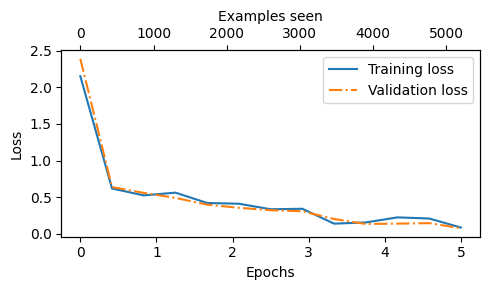

In [192]:
import matplotlib.pyplot as plt

def plot_values(epochs_seen, examples_seen, train_values, val_values, label="loss"):
    fig, ax1 = plt.subplots(figsize=(5, 3))
    ax1.plot(epochs_seen, train_values, label=f"Training {label}")
    ax1.plot(epochs_seen, val_values, linestyle="-.", label=f"Validation {label}")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend()

    ax2 = ax1.twiny()
    ax2.plot(examples_seen, train_values, alpha=0)
    ax2.set_xlabel("Examples seen")
    fig.tight_layout()
    plt.savefig(f"{label}-plot.pdf")
    plt.show()

epochs_tensor        = torch.linspace(0, num_epochs,    len(train_losses))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_losses))

plot_values(epochs_tensor, examples_seen_tensor, train_losses, val_losses)

- conclusion: the model is learning well from the training data, and there is little indication of overfitting (no noticeable gap
between the training and validation set losses).
- Using the same plot_values function, let's now also plot the classification accuracies.

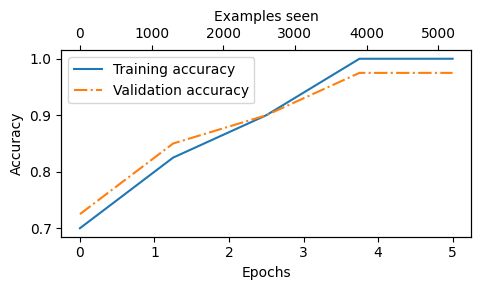

In [193]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_accs))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_accs))
plot_values(epochs_tensor, examples_seen_tensor, train_accs, val_accs, label="accuracy")

- conclusion: the model achieves a relatively high training and validation accuracy after epochs 4 and 5.
- However, we previously set eval_iter=5 when using __train_classifier_simple__, so our estimations of training and validation
performance were based on only 5 batches.
- Next: calculate performance metrics for the training, validation, and test sets across the entire dataset.

In [194]:
train_accuracy = calc_accuracy_loader(train_loader, model, device)
val_accuracy = calc_accuracy_loader(val_loader, model, device)
test_accuracy = calc_accuracy_loader(test_loader, model, device)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 97.21%
Validation accuracy: 97.32%
Test accuracy: 95.67%


- conclusion: training and test set performances are almost identical. A slight discrepancy between the training and test set accuracies suggests minimal overfitting. Typically, the validation set accuracy is somewhat higher than the test set
accuracy because the model development often involves tuning hyperparameters to perform well on the validation set, which might not generalize as effectively to the test set.
- This situation is common, but the gap could possibly be minimized by adjusting the model's settings, such as increasing the dropout rate (drop_rate) or the weight_decay parameter in the optimizer configuration.

## 6.8 Using the LLM as a spam classifier
- Use the finetuned GPT-based spam classification model. __classify_review__ follows data preprocessing steps similar to those we used in the SpamDataset. After converting text into token IDs, the function uses the model to predict an integer class label & returns the corresponding class name.

In [195]:
def classify_review(text, model, tokenizer, device, max_length=None, pad_token_id=50256):
    model.eval()
    input_ids                = tokenizer.encode(text)
    supported_context_length = model.pos_emb.weight.shape[1]
    input_ids                = input_ids[:min(max_length, supported_context_length)] #B
    input_ids               += [pad_token_id] * (max_length - len(input_ids))
    input_tensor             = torch.tensor(input_ids, device=device).unsqueeze(0) #D
    with torch.no_grad():
        logits = model(input_tensor)[:, -1, :]
    
    predicted_label = torch.argmax(logits, dim=-1).item()
    
    return "spam" if predicted_label == 1 else "not spam"

In [196]:
text_1 = (
"You are a winner you have been specially"
" selected to receive $1000 cash or a $2000 award."
)
print(classify_review(
    text_1, model, tokenizer, device, max_length=train_dataset.max_length))

spam


In [197]:
text_2 = (
"Hey, just wanted to check if we're still on"
" for dinner tonight? Let me know!"
)
print(classify_review(
    text_2, model, tokenizer, device, max_length=train_dataset.max_length))

not spam


In [198]:
# save for later
torch.save(model.state_dict(), "review_classifier.pth")

In [199]:
# then reload
model_state_dict = torch.load("review_classifier.pth")
model.load_state_dict(model_state_dict)

<All keys matched successfully>

# 7 Finetuning to Follow Instructions
- TODO
# Appendix A. Introduction to PyTorch
- TODO
# Appendix B. References and Further Reading
- TODO
# Appendix C. Exercise Solutions
- TODO
# Appendix D. Adding Bells and Whistles to the Training Loop
- TODO
# Appendix E. Parameter-ecient Finetuning with LoRA
- TODO